In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from scipy.io import arff
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings


In [4]:
pd.set_option ('display.max_columns', None)
pd.set_option ('max_colwidth', 400)

# Load Data From File

In [8]:
df = pd.read_csv("state_CA-IL.csv")



/var/folders/q8/5zyfv1pj21xg64dnyqpnntfm0000gn/T/ipykernel_63835/1921825299.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("state_CA-IL.csv")


In [10]:
display(df.head())
display(df.describe())
display(df.info())


activity_year                   lei  derived_msa-md state_code  \
0           2020  AD6GFRVSDT01YPT1CS68           16984         IL   
1           2020  AD6GFRVSDT01YPT1CS68           40900         CA   
2           2020  AD6GFRVSDT01YPT1CS68           11244         CA   
3           2020  AD6GFRVSDT01YPT1CS68           41884         CA   
4           2020  AD6GFRVSDT01YPT1CS68           16984         IL   

   county_code  census_tract conforming_loan_limit derived_loan_product_type  \
0      17111.0  1.711187e+10                     C   Conventional:First Lien   
1       6061.0  6.061020e+09                     C   Conventional:First Lien   
2       6059.0  6.059111e+09                     C   Conventional:First Lien   
3       6081.0  6.081614e+09                    NC   Conventional:First Lien   
4      17031.0  1.703182e+10                     C   Conventional:First Lien   

              derived_dwelling_category        derived_ethnicity  \
0  Single Family (1-4 Units):Site-Built   Not Hispanic or Latino   
1  Single Family (1-4 Units):Site-Built   Not Hispanic or Latino   
2  Single Family (1-4 Units):Site-Built   Not Hispanic or Latino   
3  Single Family (1-4 Units):Site-Built  Ethnicity Not Available   
4  Single Family (1-4 Units):Site-Built   Not Hispanic or Latino   

         derived_race        derived_sex  action_taken  purchaser_type  \
0               White              Joint             1               1   
1               White              Joint             1               1   
2               Asian              Joint             1               0   
3  Race Not Available  Sex Not Available             1               0   
4               White              Joint             3               0   

   preapproval  loan_type  loan_purpose  lien_status  reverse_mortgage  \
0            2          1            31            1                 2   
1            2          1            32            1                 2   
2            2          1            32            1                 2   
3            2          1            31            1                 2   
4            2          1            31            1                 2   

   open-end_line_of_credit  business_or_commercial_purpose  loan_amount  \
0                        2                               2     175000.0   
1                        2                               2     505000.0   
2                        2                               2     725000.0   
3                        2                               2     835000.0   
4                        2                               2     135000.0   

  loan_to_value_ratio interest_rate rate_spread  hoepa_status  \
0              54.215           3.0      -0.329             2   
1                80.0         3.375      -0.036             2   
2              65.682          3.25       0.014             2   
3              64.729         3.375       -0.18             2   
4              68.653           NaN         NaN             3   

  total_loan_costs total_points_and_fees origination_charges discount_points  \
0           2162.0                   NaN               999.0             NaN   
1           7550.0                   NaN              5570.0          4520.0   
2           3320.0                   NaN              1050.0             NaN   
3           3190.0                   NaN              1050.0             NaN   
4              NaN                   NaN                 NaN             NaN   

  lender_credits loan_term prepayment_penalty_term intro_rate_period  \
0          352.4       120                     NaN               NaN   
1          120.0       360                     NaN               NaN   
2        3251.25       360                     NaN              84.0   
3         741.25       360                     NaN               NaN   
4            NaN       180                     NaN               NaN   

   negative_amortization  interest_only_payment  bal

activity_year  derived_msa-md   county_code  census_tract  \
count      4310938.0    4.310938e+06  4.294065e+06  4.291708e+06   
mean          2020.0    3.373049e+04  8.291588e+03  8.292500e+09   
std              0.0    1.555437e+04  4.431406e+03  4.432034e+09   
min           2020.0    0.000000e+00  6.001000e+03  6.001400e+09   
25%           2020.0    2.099400e+04  6.037000e+03  6.037621e+09   
50%           2020.0    3.608400e+04  6.071000e+03  6.071000e+09   
75%           2020.0    4.150000e+04  6.099000e+03  6.099000e+09   
max           2020.0    9.999900e+04  1.720300e+04  1.720303e+10   

       action_taken  purchaser_type   preapproval     loan_type  loan_purpose  \
count  4.310938e+06    4.310938e+06  4.310938e+06  4.310938e+06  4.310938e+06   
mean   2.381368e+00    4.630761e+00  1.992554e+00  1.236946e+00  2.279796e+01   
std    1.806562e+00    1.507852e+01  8.596803e-02  5.800540e-01  1.342258e+01   
min    1.000000e+00    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.000000e+00    0.000000e+00  2.000000e+00  1.000000e+00  4.000000e+00   
50%    1.000000e+00    1.000000e+00  2.000000e+00  1.000000e+00  3.100000e+01   
75%    4.000000e+00    3.000000e+00  2.000000e+00  1.000000e+00  3.100000e+01   
max    8.000000e+00    7.200000e+01  2.000000e+00  4.000000e+00  3.200000e+01   

        lien_status  reverse_mortgage  open-end_line_of_credit  \
count  4.310938e+06      4.310938e+06             4.310938e+06   
mean   1.054516e+00      1.717457e+01             1.712720e+01   
std    2.270321e-01      1.288566e+02             1.288746e+02   
min    1.000000e+00      1.000000e+00             1.000000e+00   
25%    1.000000e+00      2.000000e+00             2.000000e+00   
50%    1.000000e+00      2.000000e+00             2.000000e+00   
75%    1.000000e+00      2.000000e+00             2.000000e+00   
max    2.000000e+00      1.111000e+03             1.111000e+03   

       business_or_commercial_purpose   loan_amount  hoepa_status  \
count                    4.310938e+06  4.310938e+06  4.310938e+06   
mean                     1.718874e+01  4.085214e+05  2.377791e+00   
std                      1.290177e+02  1.242472e+06  4.858708e-01   
min                      1.000000e+00  5.000000e+03  1.000000e+00   
25%                      2.000000e+00  2.150000e+05  2.000000e+00   
50%                      2.000000e+00  3.350000e+05  2.000000e+00   
75%                      2.000000e+00  4.850000e+05  3.000000e+00   
max                      1.111000e+03  7.110050e+08  3.000000e+00   

       negative_amortization  interest_only_payment  balloon_payment  \
count           4.310938e+06           4.310938e+06     4.310938e+06   
mean            1.938269e+01           1.934390e+01     1.937521e+01   
std             1.377512e+02           1.377562e+02     1.377522e+02   
min             1.000000e+00           1.000000e+00     1.000000e+00   
25%             2.000000e+00           2.000000e+00     2.000000e+00   
50%             2.000000e+00           2.000000e+00     2.000000e+00   
75%             2.000000e+00           2.000000e+00     2.000000e+00   
max             1.111000e+03           1.111000e+03     1.111000e+03   

       other_nonamortizing_features  construction_method  occupancy_type  \
count                  4.310938e+06         4.310938e+06    4.310938e+06   
mean                   1.937813e+01         1.010281e+00    1.145457e+00   
std                    1.377518e+02         1.008741e-01    5.007515e-01   
min                    1.000000e+00         1.000000e+00    1.000000e+00   
25%                    2.000000e+00         1.000000e+00    1.000000e+00   
50%                    2.000000e+00         1.000000e+00    1.000000e+00   
75%                    2.000000e+00         1.000000e+00    1.000000e+00   
max                    1.111000e+03         2.000000e+00    3.000000e+00   

       manufactured_home_secured_property_type  \
count                             4.310938e+06   
mean         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4310938 entries, 0 to 4310937
Data columns (total 99 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   activity_year                             int64  
 1   lei                                       object 
 2   derived_msa-md                            int64  
 3   state_code                                object 
 4   county_code                               float64
 5   census_tract                              float64
 6   conforming_loan_limit                     object 
 7   derived_loan_product_type                 object 
 8   derived_dwelling_category                 object 
 9   derived_ethnicity                         object 
 10  derived_race                              object 
 11  derived_sex                               object 
 12  action_taken                              int64  
 13  purchaser_type                            int64  
 14  pr

None

In [9]:
df = pd.DataFrame.copy(df1,deep=True)

# Data Cleaning

In [11]:
(df.isnull().sum()/4310938 *100).sort_values().tail(25)

aus-3                           98.174574
total_points_and_fees           98.195683
multifamily_affordable_units    98.403758
denial_reason-2                 98.442450
aus-4                           99.433418
applicant_race-3                99.515117
aus-5                           99.536458
denial_reason-3                 99.761606
co-applicant_race-3             99.786868
applicant_ethnicity-3           99.884039
co-applicant_ethnicity-3        99.953954
applicant_race-4                99.956390
denial_reason-4                 99.976896
co-applicant_race-4             99.982254
applicant_race-5                99.987752
co-applicant_race-5             99.995152
applicant_ethnicity-4           99.996428
co-applicant_ethnicity-4        99.998794
applicant_ethnicity-5           99.999142
co-applicant_ethnicity-5        99.999606
dtype: float64

In [13]:
# Columns to remove based on issuficient data from visualization

cols_drop = ['activity_year','lei','county_code','multifamily_affordable_units',
             'denial_reason-2','denial_reason-3','denial_reason-4','total_points_and_fees',
             'aus-2','aus-3','aus-4','aus-5',
             'co-applicant_race-2', 'co-applicant_race-3', 'co-applicant_race-4', 'co-applicant_race-5',
             'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5',
             'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5',
             'co-applicant_ethnicity-2', 'co-applicant_ethnicity-3', 'co-applicant_ethnicity-4', 'co-applicant_ethnicity-5',
             'prepayment_penalty_term','intro_rate_period',
             ]
df.drop(cols_drop,axis=1,inplace=True)

In [14]:
df.drop_duplicates()

derived_msa-md state_code  census_tract conforming_loan_limit  \
0                 16984         IL  1.711187e+10                     C   
1                 40900         CA  6.061020e+09                     C   
2                 11244         CA  6.059111e+09                     C   
3                 41884         CA  6.081614e+09                    NC   
4                 16984         IL  1.703182e+10                     C   
...                 ...        ...           ...                   ...   
4310933           16984         IL  1.703182e+10                     C   
4310934           41740         CA  6.073008e+09                     C   
4310935           41740         CA  6.073020e+09                     C   
4310936           16984         IL  1.703181e+10                     C   
4310937           40420         IL  1.720100e+10                     C   

        derived_loan_product_type             derived_dwelling_category  \
0         Conventional:First Lien  Single Family (1-4 Units):Site-Built   
1         Conventional:First Lien  Single Family (1-4 Units):Site-Built   
2         Conventional:First Lien  Single Family (1-4 Units):Site-Built   
3         Conventional:First Lien  Single Family (1-4 Units):Site-Built   
4         Conventional:First Lien  Single Family (1-4 Units):Site-Built   
...                           ...                                   ...   
4310933   Conventional:First Lien  Single Family (1-4 Units):Site-Built   
4310934   Conventional:First Lien  Single Family (1-4 Units):Site-Built   
4310935   Conventional:First Lien  Single Family (1-4 Units):Site-Built   
4310936   Conventional:First Lien  Single Family (1-4 Units):Site-Built   
4310937   Conventional:First Lien  Single Family (1-4 Units):Site-Built   

               derived_ethnicity               derived_race  \
0         Not Hispanic or Latino                      White   
1         Not Hispanic or Latino                      White   
2         Not Hispanic or Latino                      Asian   
3        Ethnicity Not Available         Race Not Available   
4         Not Hispanic or Latino                      White   
...                          ...                        ...   
4310933   Not Hispanic or Latino  Black or African American   
4310934   Not Hispanic or Latino                      Asian   
4310935       Hispanic or Latino         Race Not Available   
4310936       Hispanic or Latino         Race Not Available   
4310937       Hispanic or Latino                      White   

               derived_sex  action_taken  purchaser_type  preapproval  \
0                    Joint             1               1            2   
1                    Joint             1               1            2   
2                    Joint             1               0            2   
3        Sex Not Available             1               0            2   
4                    Joint             3               0            2   
...                    ...           ...             ...          ...   
4310933             Female             1               1            2   
4310934              Joint             4               0            2   
4310935             Female             1               1            2   
4310936               Male             1               1            1   
4310937             Female             1               3            2   

         loan_type  loan_purpose  lien_status  reverse_mortgage  \
0                1            31            1                 2   
1                1            32            1                 2   
2                1            32            1                 2   
3                1            31            1                 2   
4                1            31            1                 2   
...            ...           ...          ...               ...   
4310933          1             1            1                 2   
4310934          1            31            1    

In [17]:
(df.isnull().sum()/4304005 *100).sort_values().tail(25)

negative_amortization                 0.000000
tract_median_age_of_housing_units     0.000000
loan_amount                           0.000000
hoepa_status                          0.000000
co-applicant_race-1                   0.005832
co-applicant_ethnicity-1              0.011803
applicant_race-1                      0.012639
applicant_ethnicity-1                 0.033178
conforming_loan_limit                 0.346468
census_tract                          0.446793
loan_term                             0.929344
applicant_age_above_62                7.084541
income                               13.432187
property_value                       22.453134
interest_rate                        29.111072
loan_to_value_ratio                  33.967340
debt_to_income_ratio                 35.864433
origination_charges                  37.836155
total_loan_costs                     38.361410
rate_spread                          43.250856
co-applicant_age_above_62            55.548425
lender_credit

In [1]:
def check_str_in_num(colname):
    for index, value in enumerate(df[colname]):
        
        if isinstance(value, str)  :
            print(f"Index {index}: Value '{value}' is of type {type(value)}")

In [ ]:
# Columns numerical with Excempt Valu
#'debt_to_income_Ratio','interest_rate'

df.loc[df['debt_to_income_ratio'] == 'Exempt' , 'debt_to_income_ratio'] = 0
df.loc[df['interest_rate'] == 'Exempt' , 'interest_rate'] = 0
df.loc[df['property_value'] == 'Exempt' , 'property_value'] = 0
df.loc[df['loan_term'] == 'Exempt' , 'loan_term'] = 0
df['interest_rate'] = pd.to_numeric(df['interest_rate'])
df['property_value'] = pd.to_numeric(df['property_value'])
df['loan_term'] = pd.to_numeric(df['loan_term'])

In [ ]:
# fill with Mean
cols = ['conforming_loan_limit','loan_term','income','property_value','interest_rate']
for col in cols:
    df[col]=df[col].fillna(df[col].mean())

In [ ]:
# fill with 0 .fillna(0)
cols = ['conforming_loan_limit','loan_term','income','property_value','interest_rate']
for col in cols:
    df[col]=df[col].fillna(df[col].mean())

In [100]:
df[(df['interest_rate'] == 'Exempt') ]

Empty DataFrame
Columns: [derived_msa-md, state_code, census_tract, conforming_loan_limit, derived_loan_product_type, derived_dwelling_category, derived_ethnicity, derived_race, derived_sex, action_taken, purchaser_type, preapproval, loan_type, loan_purpose, lien_status, reverse_mortgage, open-end_line_of_credit, business_or_commercial_purpose, loan_amount, loan_to_value_ratio, interest_rate, hoepa_status, loan_term, negative_amortization, interest_only_payment, balloon_payment, other_nonamortizing_features, property_value, construction_method, occupancy_type, manufactured_home_secured_property_type, manufactured_home_land_property_interest, total_units, income, debt_to_income_ratio, applicant_credit_score_type, co-applicant_credit_score_type, applicant_ethnicity-1, co-applicant_ethnicity-1, applicant_ethnicity_observed, co-applicant_ethnicity_observed, applicant_race-1, co-applicant_race-1, applicant_race_observed, co-applicant_race_observed, applicant_sex, co-applicant_sex, applicant_sex_observed, co-applicant_sex_observed, applicant_age, co-applicant_age, applicant_age_above_62, submission_of_application, initially_payable_to_institution, aus-1, denial_reason-1, tract_population, tract_minority_population_percent, ffiec_msa_md_median_family_income, tract_to_msa_income_percentage, tract_owner_occupied_units, tract_one_to_four_family_homes, tract_median_age_of_housing_units, approved]
Index: []

[0 rows x 64 columns]

<Axes: >

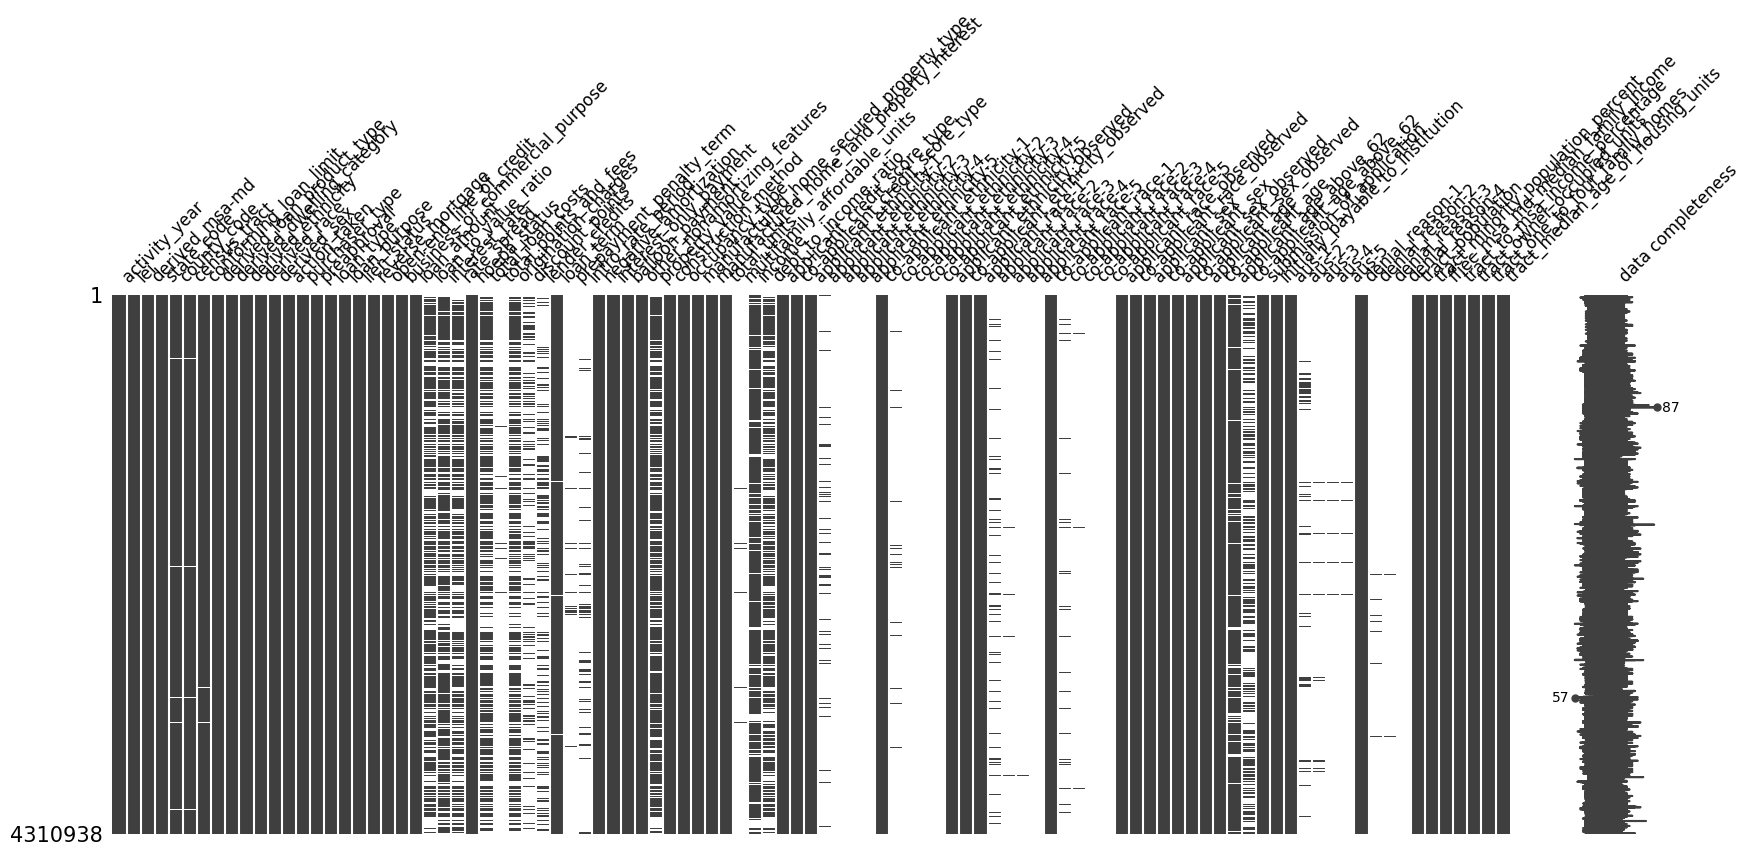

In [102]:
msno.matrix(df, labels=True, figsize=(20, 7), fontsize=12)


<Axes: >

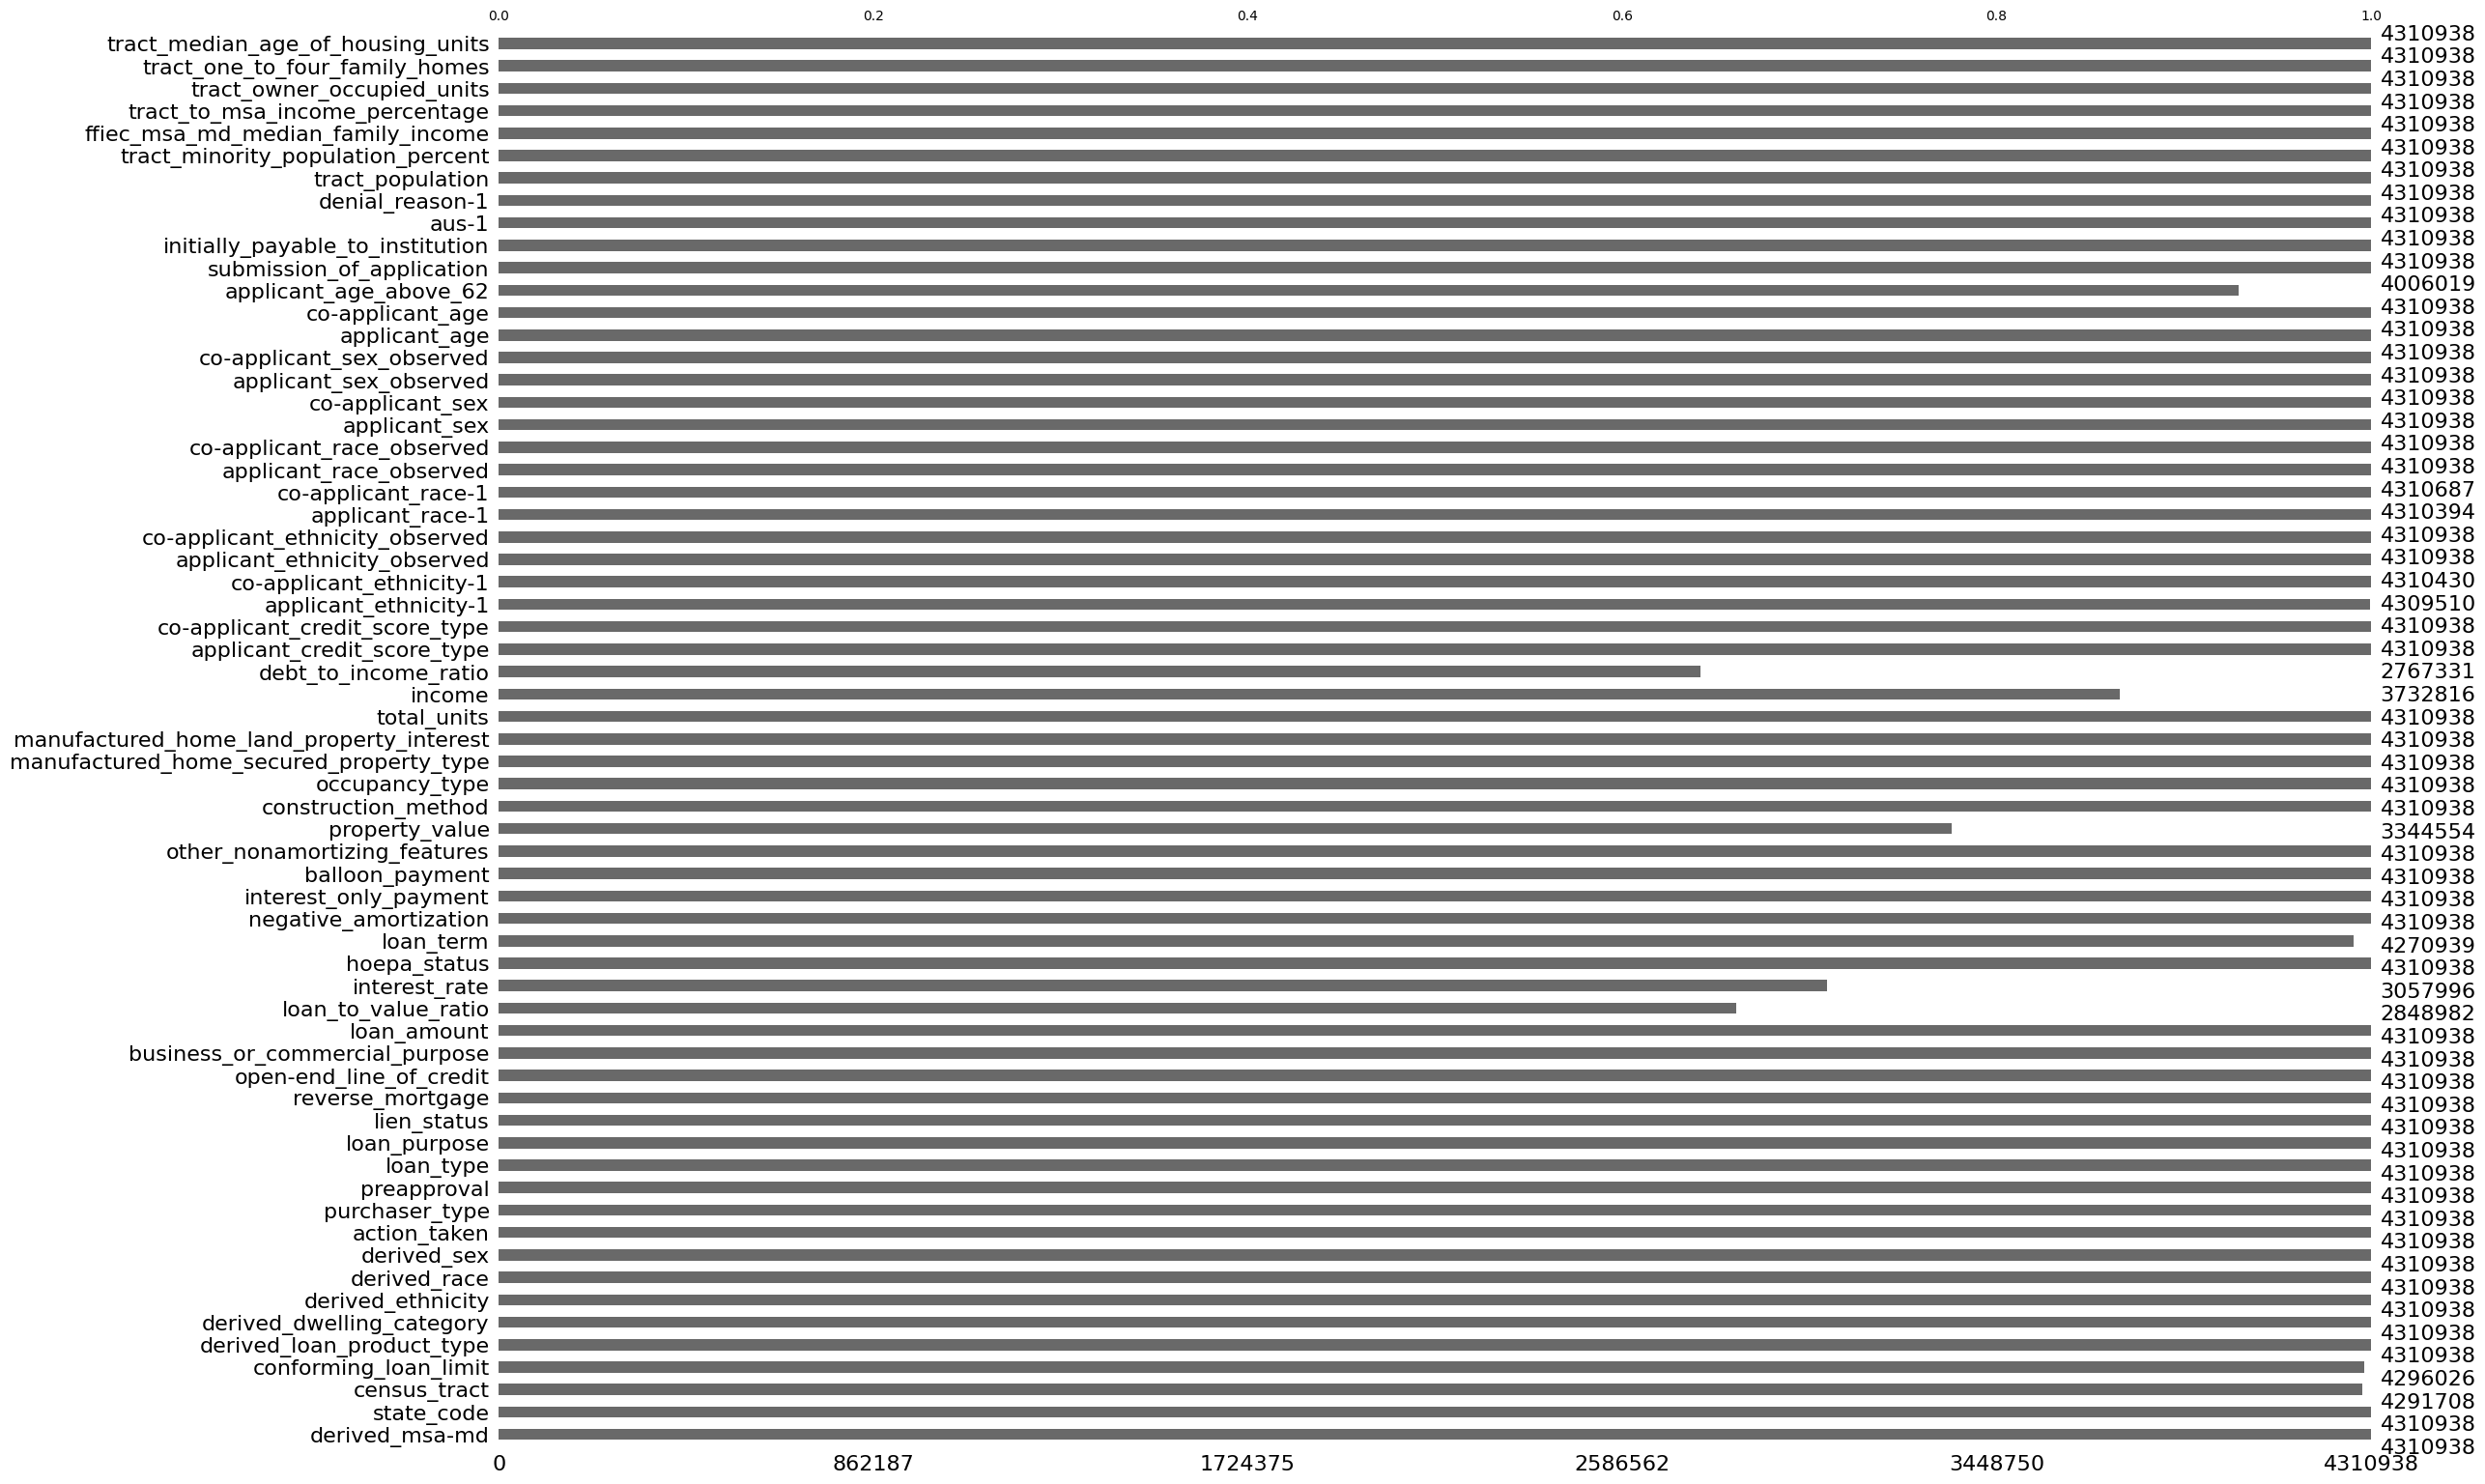

In [19]:

msno.bar(df)

# Remove Data
### Insufficient values or Data is not relevant

In [7]:
# Columns to remove based on issuficient data from visualization

cols_drop = ['activity_year','lei','county_code','multifamily_affordable_units',
             'denial_reason-2','denial_reason-3','denial_reason-4',
             'aus-2','aus-3','aus-4','aus-5',
             'co-applicant_race-2', 'co-applicant_race-3', 'co-applicant_race-4', 'co-applicant_race-5',
             'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5',
             'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5',
             'co-applicant_ethnicity-2', 'co-applicant_ethnicity-3', 'co-applicant_ethnicity-4', 'co-applicant_ethnicity-5',
             ]
df.drop(cols_drop,axis=1,inplace=True)

## Calculate % of Missing Data Points (Nan or Null)

In [8]:
for col in df.columns:
    missing_percent =df[col].isnull().values.sum()*100/df.shape[0]
    print('Col name:',col,' Nan Count: ',df[col].isnull().sum()," percentage missing: ",missing_percent)
    if missing_percent>36:
        df.drop(col,axis=1,inplace=True)

Col name: derived_msa-md  Nan Count:  0  percentage missing:  0.0
Col name: state_code  Nan Count:  0  percentage missing:  0.0
Col name: census_tract  Nan Count:  19230  percentage missing:  0.44607461299605794
Col name: conforming_loan_limit  Nan Count:  14912  percentage missing:  0.3459107971397408
Col name: derived_loan_product_type  Nan Count:  0  percentage missing:  0.0
Col name: derived_dwelling_category  Nan Count:  0  percentage missing:  0.0
Col name: derived_ethnicity  Nan Count:  0  percentage missing:  0.0
Col name: derived_race  Nan Count:  0  percentage missing:  0.0
Col name: derived_sex  Nan Count:  0  percentage missing:  0.0
Col name: action_taken  Nan Count:  0  percentage missing:  0.0
Col name: purchaser_type  Nan Count:  0  percentage missing:  0.0
Col name: preapproval  Nan Count:  0  percentage missing:  0.0
Col name: loan_type  Nan Count:  0  percentage missing:  0.0
Col name: loan_purpose  Nan Count:  0  percentage missing:  0.0
Col name: lien_status  Nan C

In [10]:
#  Remove data where participants withdrew application
df.drop(df.loc[df['action_taken'] == 4].index,inplace=True)
df.drop(df.loc[df['applicant_age']=='8888'].index, inplace=True)
df.drop(df.loc[df['co-applicant_age']=='8888'].index, inplace=True)
df.drop(df.loc[df['applicant_age']=='9999'].index, inplace=True)
df.drop(df.loc[df['co-applicant_age']=='9999'].index, inplace=True)


In [9]:
df.describe()

derived_msa-md  census_tract  action_taken  purchaser_type  \
count    4.310938e+06  4.291708e+06  4.310938e+06    4.310938e+06   
mean     3.373049e+04  8.292500e+09  2.381368e+00    4.630761e+00   
std      1.555437e+04  4.432034e+09  1.806562e+00    1.507852e+01   
min      0.000000e+00  6.001400e+09  1.000000e+00    0.000000e+00   
25%      2.099400e+04  6.037621e+09  1.000000e+00    0.000000e+00   
50%      3.608400e+04  6.071000e+09  1.000000e+00    1.000000e+00   
75%      4.150000e+04  6.099000e+09  4.000000e+00    3.000000e+00   
max      9.999900e+04  1.720303e+10  8.000000e+00    7.200000e+01   

        preapproval     loan_type  loan_purpose   lien_status  \
count  4.310938e+06  4.310938e+06  4.310938e+06  4.310938e+06   
mean   1.992554e+00  1.236946e+00  2.279796e+01  1.054516e+00   
std    8.596803e-02  5.800540e-01  1.342258e+01  2.270321e-01   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.000000e+00  1.000000e+00  4.000000e+00  1.000000e+00   
50%    2.000000e+00  1.000000e+00  3.100000e+01  1.000000e+00   
75%    2.000000e+00  1.000000e+00  3.100000e+01  1.000000e+00   
max    2.000000e+00  4.000000e+00  3.200000e+01  2.000000e+00   

       reverse_mortgage  open-end_line_of_credit  ...  \
count      4.310938e+06             4.310938e+06  ...   
mean       1.717457e+01             1.712720e+01  ...   
std        1.288566e+02             1.288746e+02  ...   
min        1.000000e+00             1.000000e+00  ...   
25%        2.000000e+00             2.000000e+00  ...   
50%        2.000000e+00             2.000000e+00  ...   
75%        2.000000e+00             2.000000e+00  ...   
max        1.111000e+03             1.111000e+03  ...   

       initially_payable_to_institution         aus-1  denial_reason-1  \
count                      4.310938e+06  4.310938e+06     4.310938e+06   
mean                       1.655782e+01  1.846209e+01     2.025650e+01   
std                        1.289812e+02  1.294875e+02     1.087865e+02   
min                        1.000000e+00  1.000000e+00     1.000000e+00   
25%                        1.000000e+00  1.000000e+00     1.000000e+01   
50%                        1.000000e+00  2.000000e+00     1.000000e+01   
75%                        1.000000e+00  6.000000e+00     1.000000e+01   
max                        1.111000e+03  1.111000e+03     1.111000e+03   

       tract_population  tract_minority_population_percent  \
count      4.310938e+06                       4.310938e+06   
mean       5.805915e+03                       4.798357e+01   
std        3.007512e+03                       2.616195e+01   
min        0.000000e+00                       0.000000e+00   
25%        4.019000e+03                       2.657000e+01   
50%        5.279000e+03                       4.511000e+01   
75%        6.798000e+03                       6.947000e+01   
max        3.945400e+04                       1.000000e+02   

       ffiec_msa_md_median_family_income  tract_to_msa_income_percentage  \
count                       4.310938e+06                    4.310938e+06   
mean                        8.975530e+04                    1.228380e+02   
std                         2.107603e+04                    4.861284e+01   
min                         0.000000e+00                    0.000000e+00   
25%                         7.730000e+04                    9.000000e+01   
50%                         8.480000e+04                    1.180000e+02   
75%                         1.027000e+05                    1.500000e+02   
max                         1.593000e+05                    3.990000e+02   

       tract_owner_occupied_units  tract_one_to_four_family_homes  \
count                4.310938e+06                    4.310938e+06   
mean                 1.309411e+03                    1.768138e+03   
std                  7.654463e+02                    9.334339e+02   
min                  0.000000e+00                    0.000000e+00   
25%                  8.150000

In [11]:
(df.isnull().sum()/4310938*100).sort_values().tail(20)


reverse_mortgage                      0.000000
tract_median_age_of_housing_units     0.000000
balloon_payment                       0.000000
loan_amount                           0.000000
interest_only_payment                 0.000000
negative_amortization                 0.000000
hoepa_status                          0.000000
co-applicant_race-1                   0.005822
co-applicant_ethnicity-1              0.011784
applicant_race-1                      0.012619
applicant_ethnicity-1                 0.033125
conforming_loan_limit                 0.345911
census_tract                          0.446075
loan_term                             0.927849
applicant_age_above_62                7.073147
income                               13.410585
property_value                       22.417024
interest_rate                        29.064255
loan_to_value_ratio                  33.912712
debt_to_income_ratio                 35.806755
dtype: float64

In [23]:

cols

Index(['derived_msa-md', 'state_code', 'census_tract', 'conforming_loan_limit',
       'derived_loan_product_type', 'derived_dwelling_category',
       'derived_ethnicity', 'derived_race', 'derived_sex', 'action_taken',
       'purchaser_type', 'preapproval', 'loan_type', 'loan_purpose',
       'lien_status', 'reverse_mortgage', 'open-end_line_of_credit',
       'business_or_commercial_purpose', 'loan_amount', 'loan_to_value_ratio',
       'interest_rate', 'hoepa_status', 'loan_term', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'construction_method',
       'occupancy_type', 'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_units', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity-1',
       'co-applicant_ethnicity-1', 'applicant_ethnicity_observed',
       'co-appl

In [44]:
# np.issubdtype(df['A'].dtype, np.number)
# df.select_dtypes(include=['int64', 'float64'])
cols = df.columns

for col in cols:
    if df[col].isnull().sum()/4310938*100>0:
        display(df[col].describe(include='all'))
        if np.issubdtype(df[col].dtype, np.number):
            df[col] = df[col].fillna(df[col].median())

count     4296026
unique          3
top             C
freq      3987030
Name: conforming_loan_limit, dtype: object

count     2848982.0
unique     188307.0
top            80.0
freq       134357.0
Name: loan_to_value_ratio, dtype: float64

count    3.057996e+06
mean     3.161964e+00
std      1.388978e+01
min      0.000000e+00
25%      2.750000e+00
50%      3.000000e+00
75%      3.500000e+00
max      2.362500e+04
Name: interest_rate, dtype: float64

count    4.270939e+06
mean     3.240412e+02
std      1.819420e+02
min      0.000000e+00
25%      3.600000e+02
50%      3.600000e+02
75%      3.600000e+02
max      3.390000e+05
Name: loan_term, dtype: float64

count    3.344554e+06
mean     7.134956e+05
std      2.446126e+06
min      0.000000e+00
25%      3.550000e+05
50%      5.550000e+05
75%      8.250000e+05
max      1.500005e+09
Name: property_value, dtype: float64

count    3.732816e+06
mean     5.469805e+02
std      4.469041e+04
min     -2.578500e+04
25%      7.600000e+01
50%      1.170000e+02
75%      1.800000e+02
max      8.487927e+07
Name: income, dtype: float64

count      2767331
unique          20
top       20%-<30%
freq        579744
Name: debt_to_income_ratio, dtype: object

count    4.309510e+06
mean     2.289890e+00
std      1.242975e+00
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.400000e+01
Name: applicant_ethnicity-1, dtype: float64

count    4.310430e+06
mean     3.679935e+00
std      1.574641e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      1.400000e+01
Name: co-applicant_ethnicity-1, dtype: float64

count    4.310394e+06
mean     5.181162e+00
std      2.763185e+00
min      1.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      6.000000e+00
max      4.400000e+01
Name: applicant_race-1, dtype: float64

count    4.310687e+06
mean     6.669032e+00
std      2.388554e+00
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      8.000000e+00
max      4.400000e+01
Name: co-applicant_race-1, dtype: float64

count     4006019
unique          2
top            No
freq      3237787
Name: applicant_age_above_62, dtype: object

# fill in missing

In [45]:
df['conforming_loan_limit'] = df['conforming_loan_limit'].fillna('C')

In [49]:

df['loan_to_value_ratio'] = df['loan_to_value_ratio'].fillna(80)

In [46]:
df['debt_to_income_ratio'] = df['debt_to_income_ratio'].fillna('20%-<30%')

In [47]:
df['applicant_age_above_62'] = df['applicant_age_above_62'].fillna('No')

In [48]:
(df.isnull().sum()/4310938*100).sort_values().tail(20)

preapproval                                 0.000000
loan_type                                   0.000000
loan_purpose                                0.000000
manufactured_home_secured_property_type     0.000000
lien_status                                 0.000000
open-end_line_of_credit                     0.000000
business_or_commercial_purpose              0.000000
loan_amount                                 0.000000
interest_rate                               0.000000
hoepa_status                                0.000000
loan_term                                   0.000000
negative_amortization                       0.000000
interest_only_payment                       0.000000
balloon_payment                             0.000000
other_nonamortizing_features                0.000000
property_value                              0.000000
construction_method                         0.000000
reverse_mortgage                            0.000000
tract_median_age_of_housing_units           0.

IndexError: index 40 is out of bounds for axis 0 with size 40

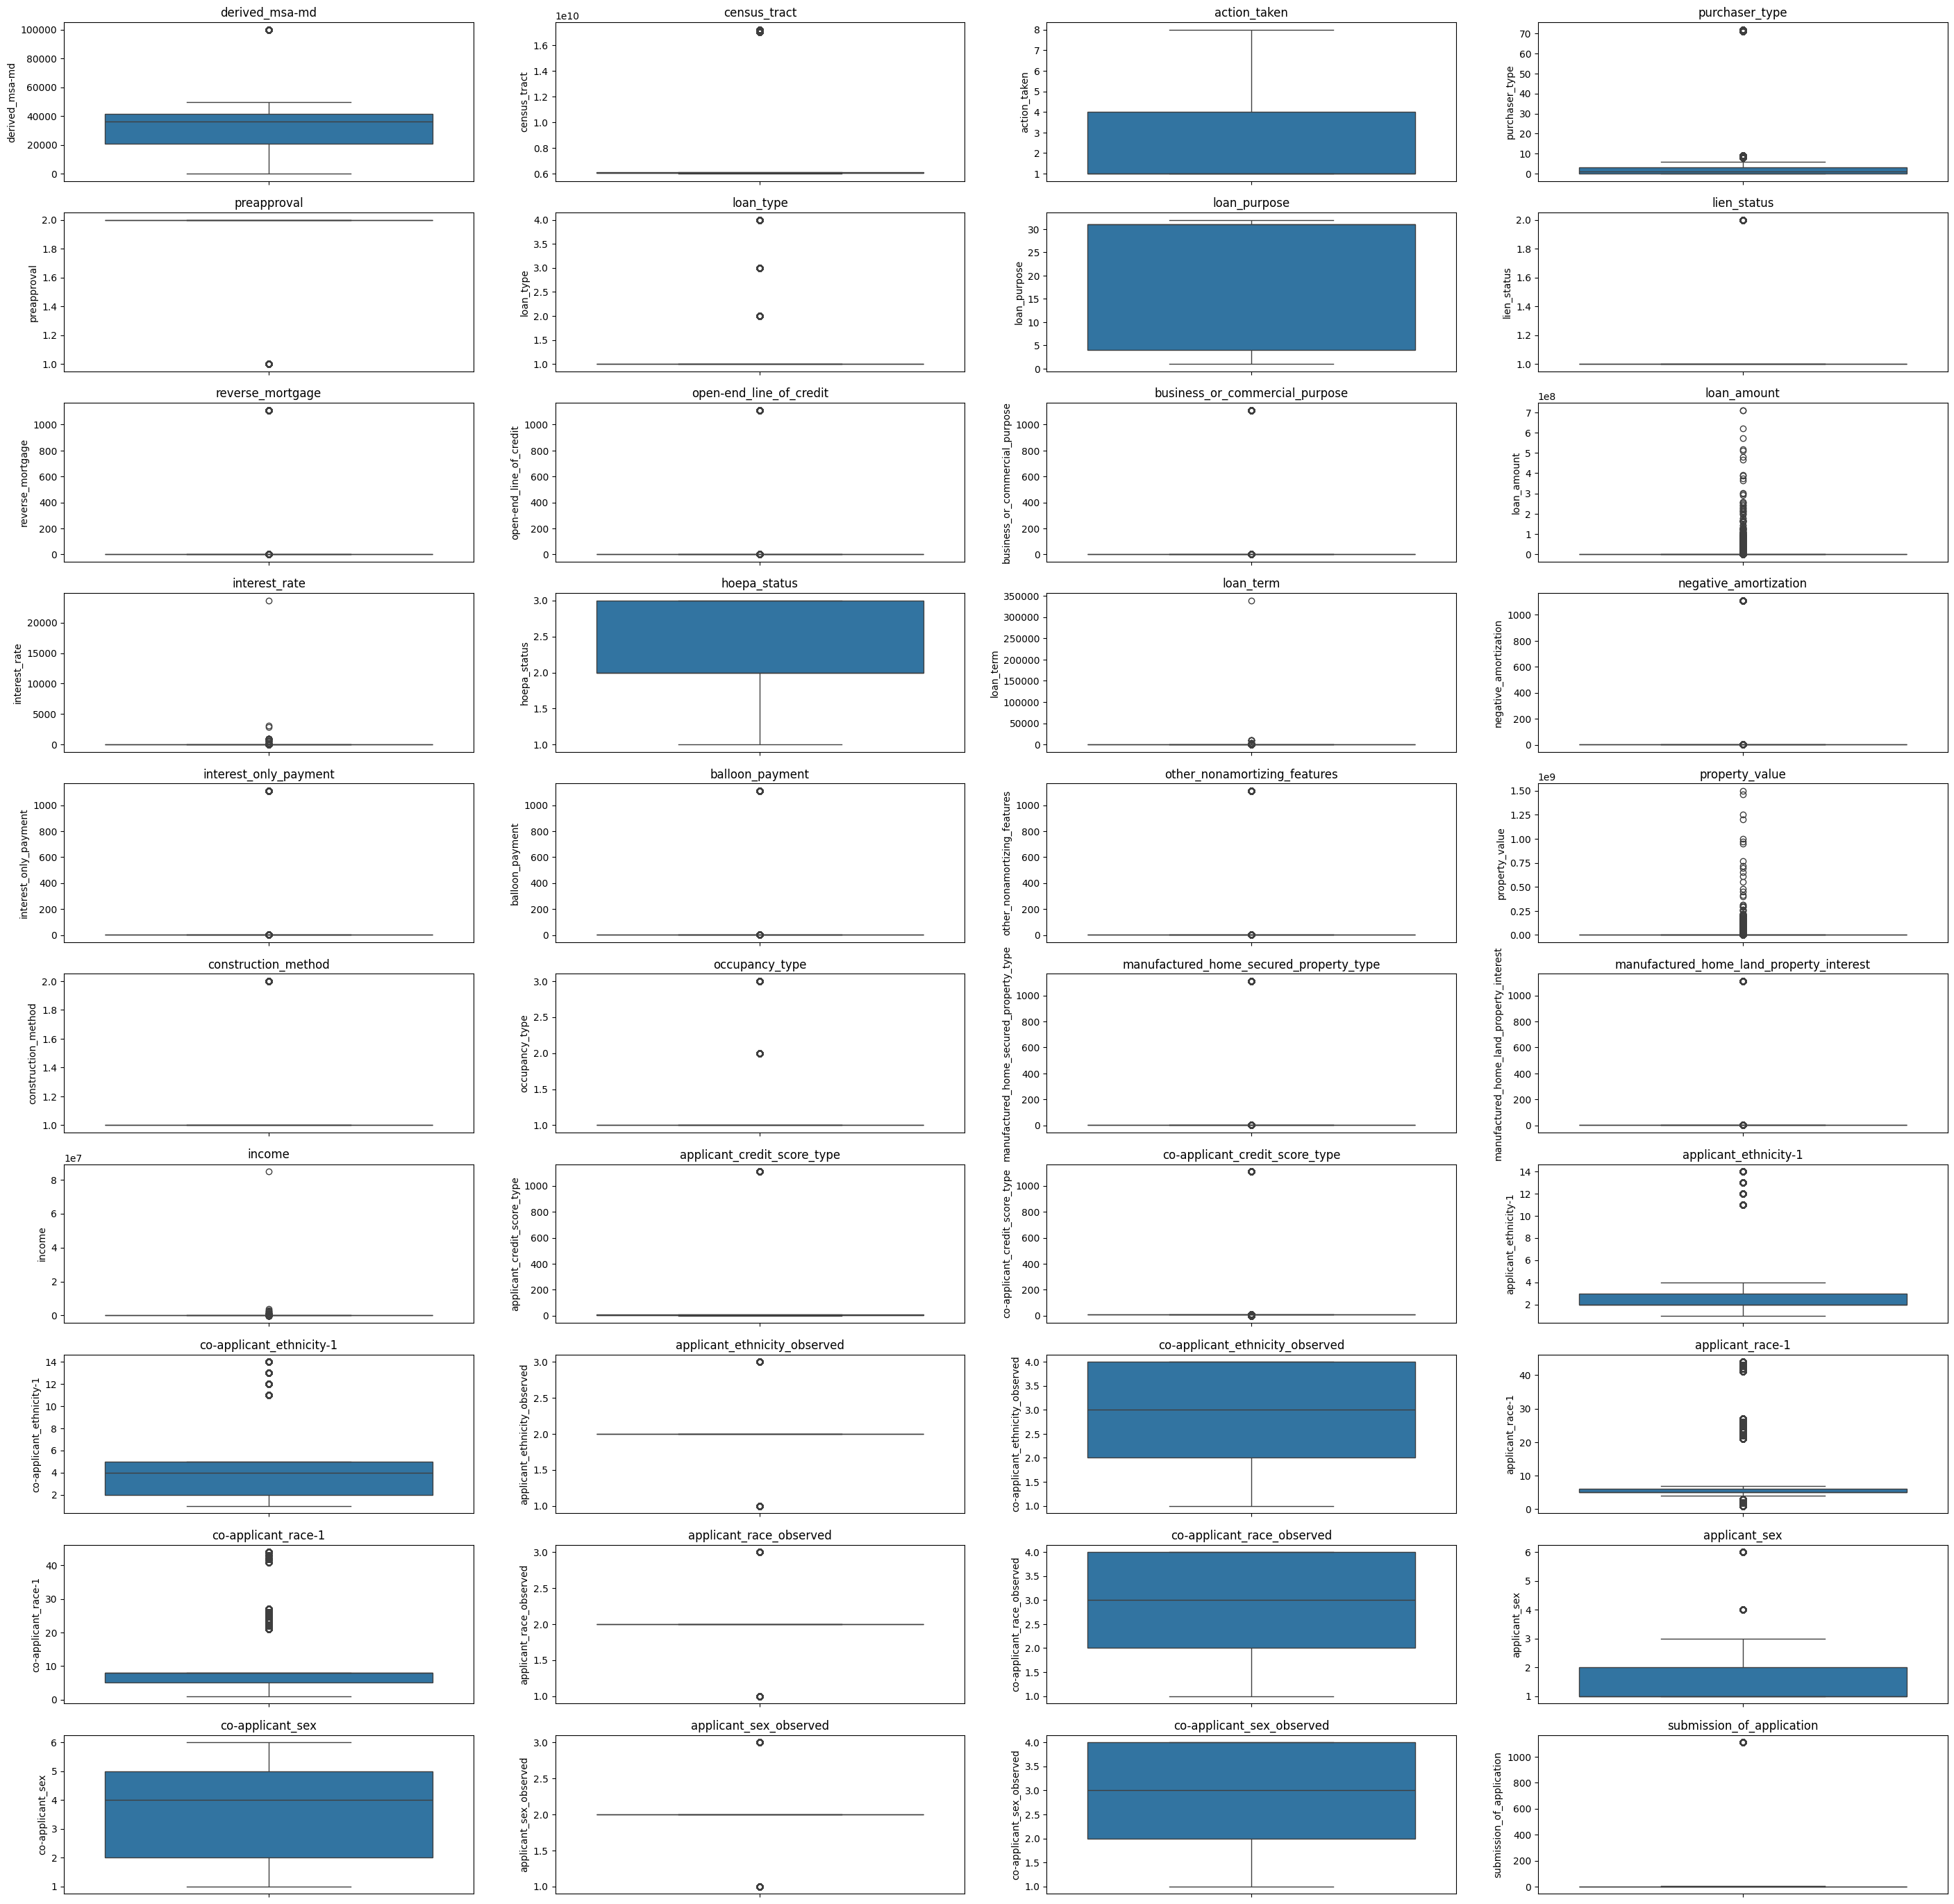

In [50]:
df_numeric = df.select_dtypes(include='number').copy()
fig, axs = plt.subplots(10, 4,figsize = (35,35))
# Flatten the list of lists of subplots into a single list
axs = axs.ravel()
# Plot the boxplots for each column on the corresponding subplot
for i, column in enumerate(df_numeric):
  sns.boxplot(data=df_numeric[column], ax=axs[i])
  axs[i].set_title(column)

<Axes: xlabel='interest_rate', ylabel='state_code'>

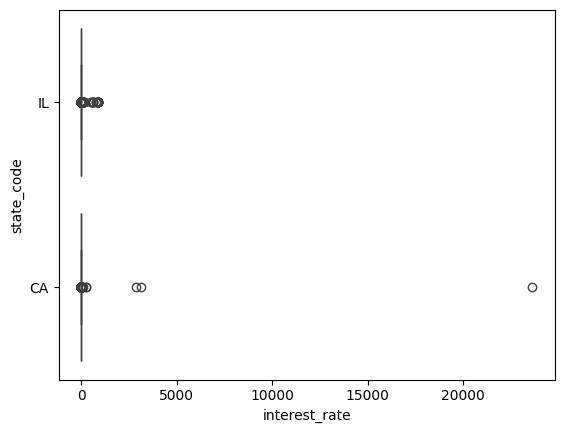

In [51]:

sns.boxplot(x=df["interest_rate"],y=df['state_code'])


In [155]:
# Check Statistics
def check_stats(col,y_label,title):
    print("max",df[col].max())
    print("min",df[col].min())
    print("mean",df[col].mean())
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define limits for outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Remove outliers
    df_filtered = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

    ax = sns.boxplot(x=df_filtered['state_code'],y=df_filtered[col])
    sns.set_theme(rc={'axes.formatter.limits': (-8, 9)})
    ax.set_xlabel('State Code')  # for x-axis
    ax.set_ylabel(y_label)
    ax.set_title(title)
    plt.show()
   

In [ ]:
key_char =['interest_rate','property_value','income','loan_term','loan_amount','occupancy_type']

In [92]:
df1.shape[0]-df.shape[0]

2666770

In [156]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
key_characteristics = ['loan_amount','income','interest_rate','debt_to_income_ratio','property_value','occupancy_type','derived_sex','applicant_age','loan_term']
df[key_characteristics].describe()


loan_amount      income  interest_rate  property_value  \
count   1644168.000 1513161.000    1375341.000     1489354.000   
mean     423105.583     677.608          3.094      753752.473   
std      793425.611    9998.751          2.804     1810370.522   
min        5000.000  -25785.000          0.000           0.000   
25%      245000.000      94.000          2.750      395000.000   
50%      365000.000     140.000          3.000      605000.000   
75%      515000.000     209.000          3.375      895000.000   
max   574005000.000 3861652.000       3125.000  1250005000.000   

       occupancy_type   loan_term  
count     1644168.000 1634348.000  
mean            1.126     321.340  
std             0.464     276.736  
min             1.000       0.000  
25%             1.000     360.000  
50%             1.000     360.000  
75%             1.000     360.000  
max             3.000  339000.000

max 339000.0
min 0.0
mean 324.04116729365603


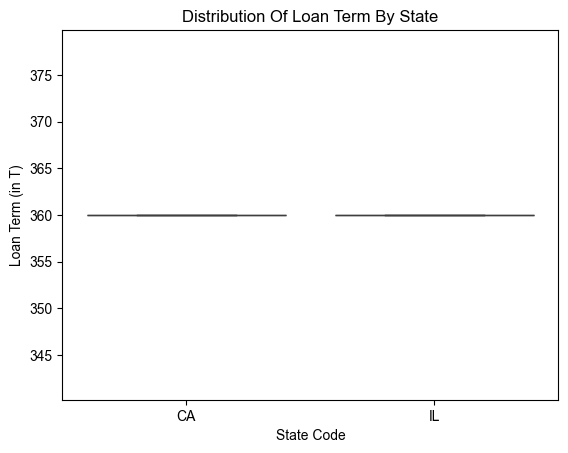

In [20]:

check_stats('loan_term','Loan Term (in T)','Distribution Of Loan Term By State')

max 1250005000.0
min 0.0
mean 753752.4725485009


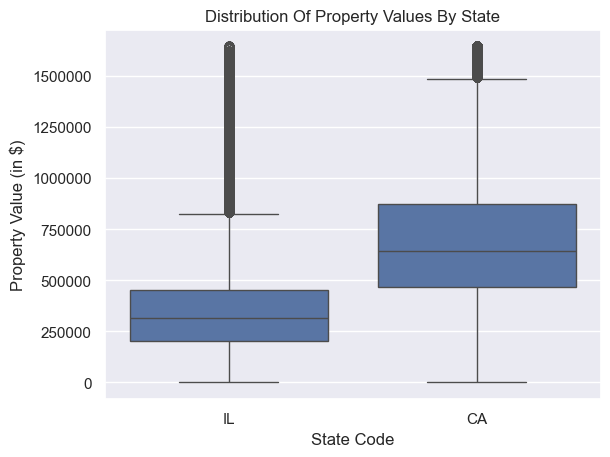

In [157]:
check_stats('property_value', 'Property Value (in $)','Distribution Of Property Values By State')

max 574005000.0
min 5000.0
mean 423105.5828844741


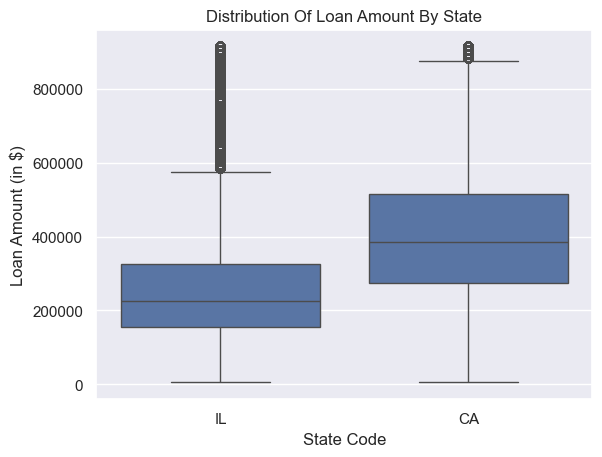

In [194]:
check_stats('loan_amount','Loan Amount (in $)','Distribution Of Loan Amount By State')


max 3125.0
min 0.0
mean 3.0943373330686708


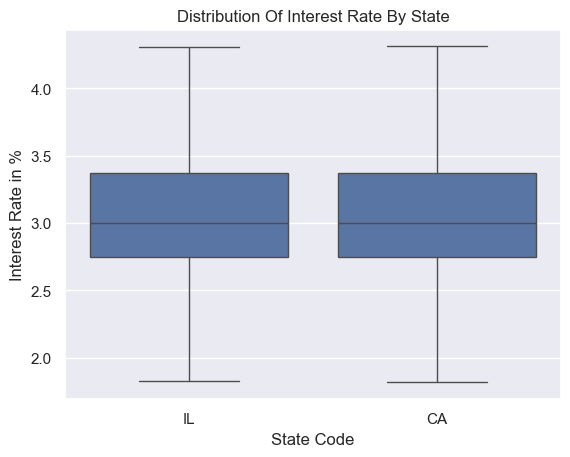

In [195]:

check_stats('interest_rate','Interest Rate in %','Distribution Of Interest Rate By State')

max 3861652.0
min -25785.0
mean 677.6082498822002


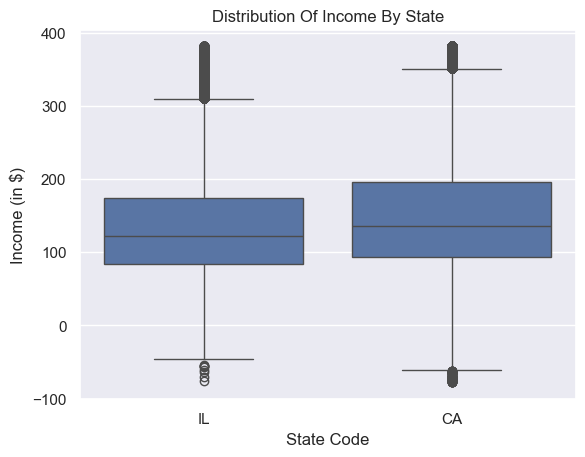

In [196]:

check_stats('income','Income (in $)','Distribution Of Income By State')

In [158]:

def create_sns_boxplot_grid(dataframe):
    # Set up a matplotlib figure with a 3x3 grid of axes
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust the figure size as needed
    axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing
    
    # Iterate over each subplot and fill it with a boxplot
    for i, ax in enumerate(axes):
        # Assuming that the DataFrame's columns are to be plotted
        if i < len(dataframe.columns):
            sns.boxplot(y=dataframe.iloc[:, i], ax=ax)
            ax.set_title(f'Boxplot for {dataframe.columns[i]}')
        else:
            ax.set_visible(False)  # Hide extra subplots if less than 9 columns
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()


In [36]:
def create_sns_barplot_grid(dataframe):
    # Set up a matplotlib figure with a 3x3 grid of axes
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # Adjust the figure size as needed
    axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing
    
    # Iterate over each subplot and fill it with a boxplot
    for i, ax in enumerate(axes):
        # Assuming that the DataFrame's columns are to be plotted
        if i < len(dataframe.columns):
            sns.countplot(y=dataframe.iloc[:, i], ax=ax)
            ax.set_title(f'Boxplot for {dataframe.columns[i]}')
        else:
            ax.set_visible(False)  # Hide extra subplots if less than 9 columns
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

In [98]:
100*df[df['debt_to_income_ratio']=='50%''-60%']['state_code'].count()/df.shape[0]

3.130337045849329

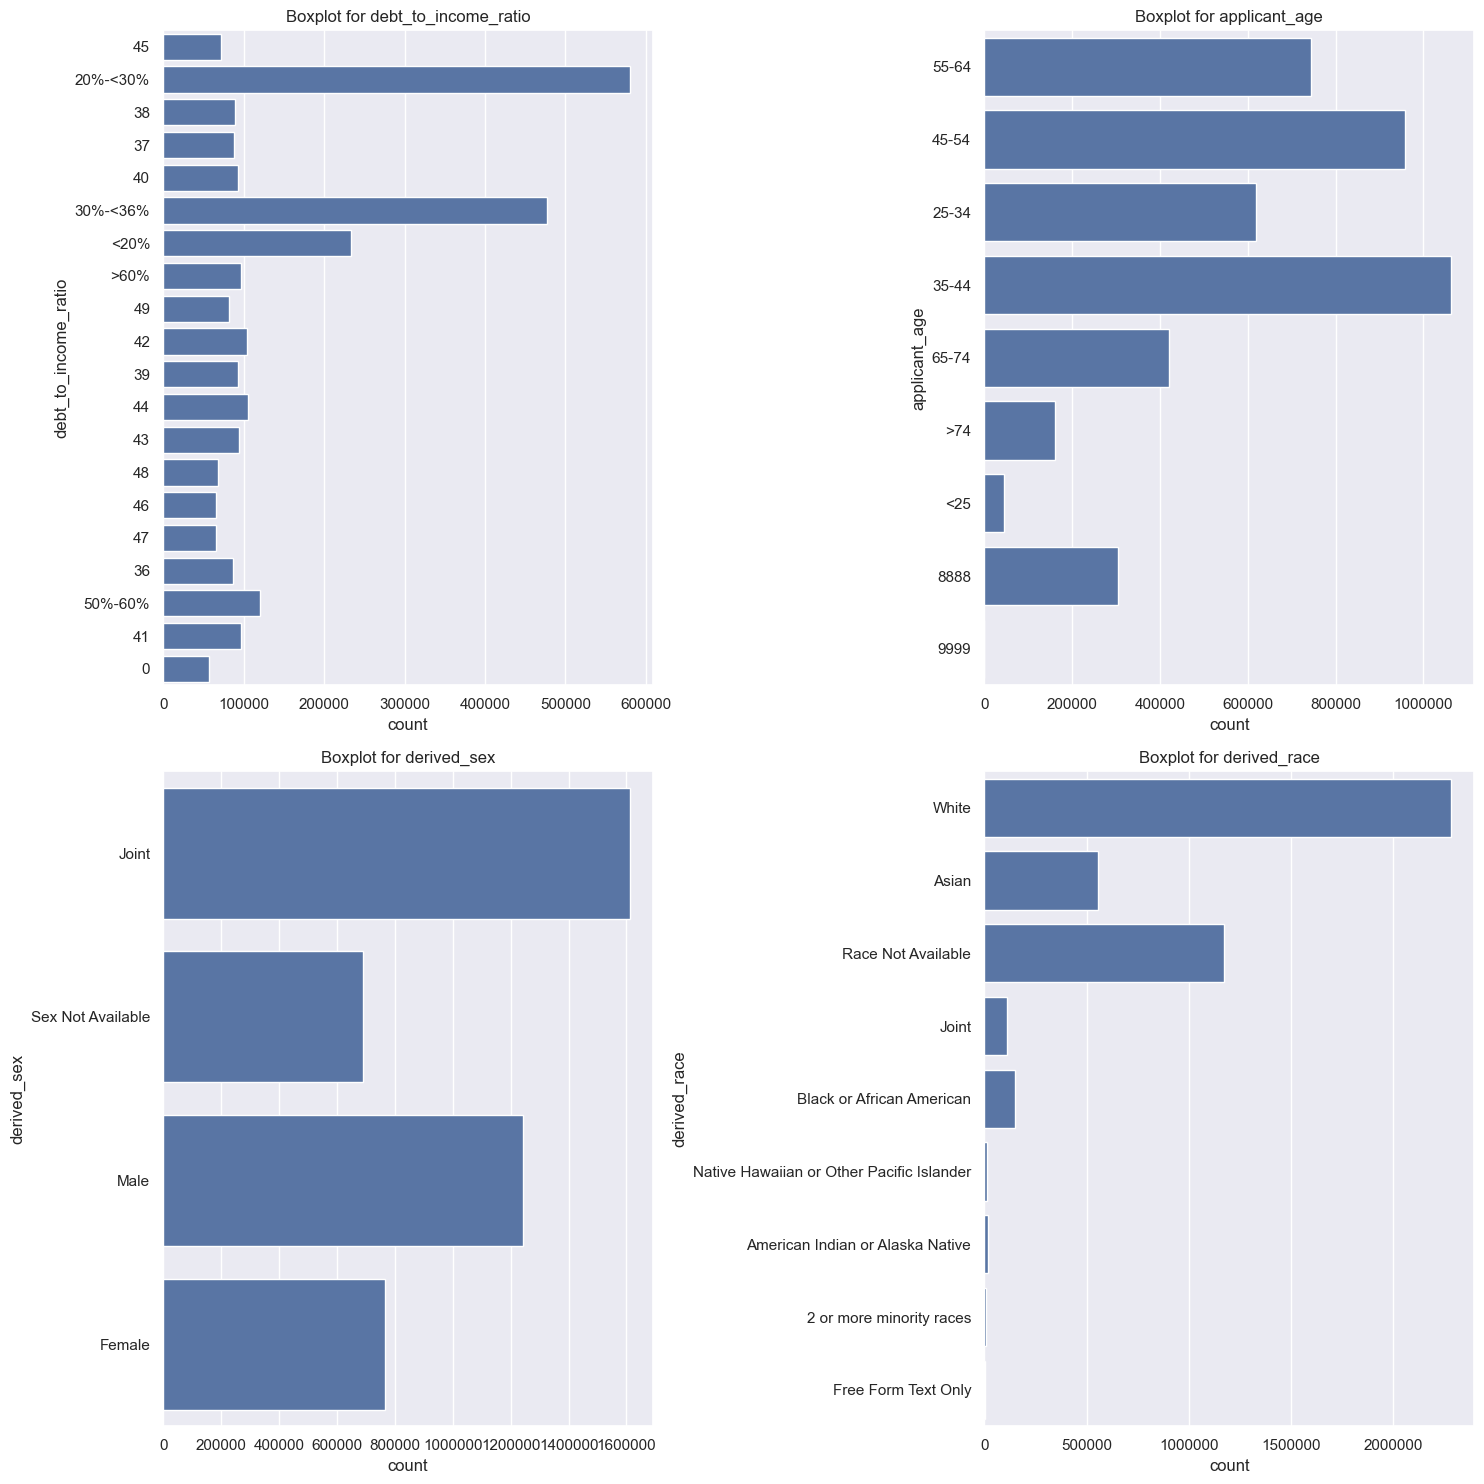

In [37]:
df_cat = df[['debt_to_income_ratio','applicant_age','derived_sex','derived_race'] ]
create_sns_barplot_grid(df_cat)

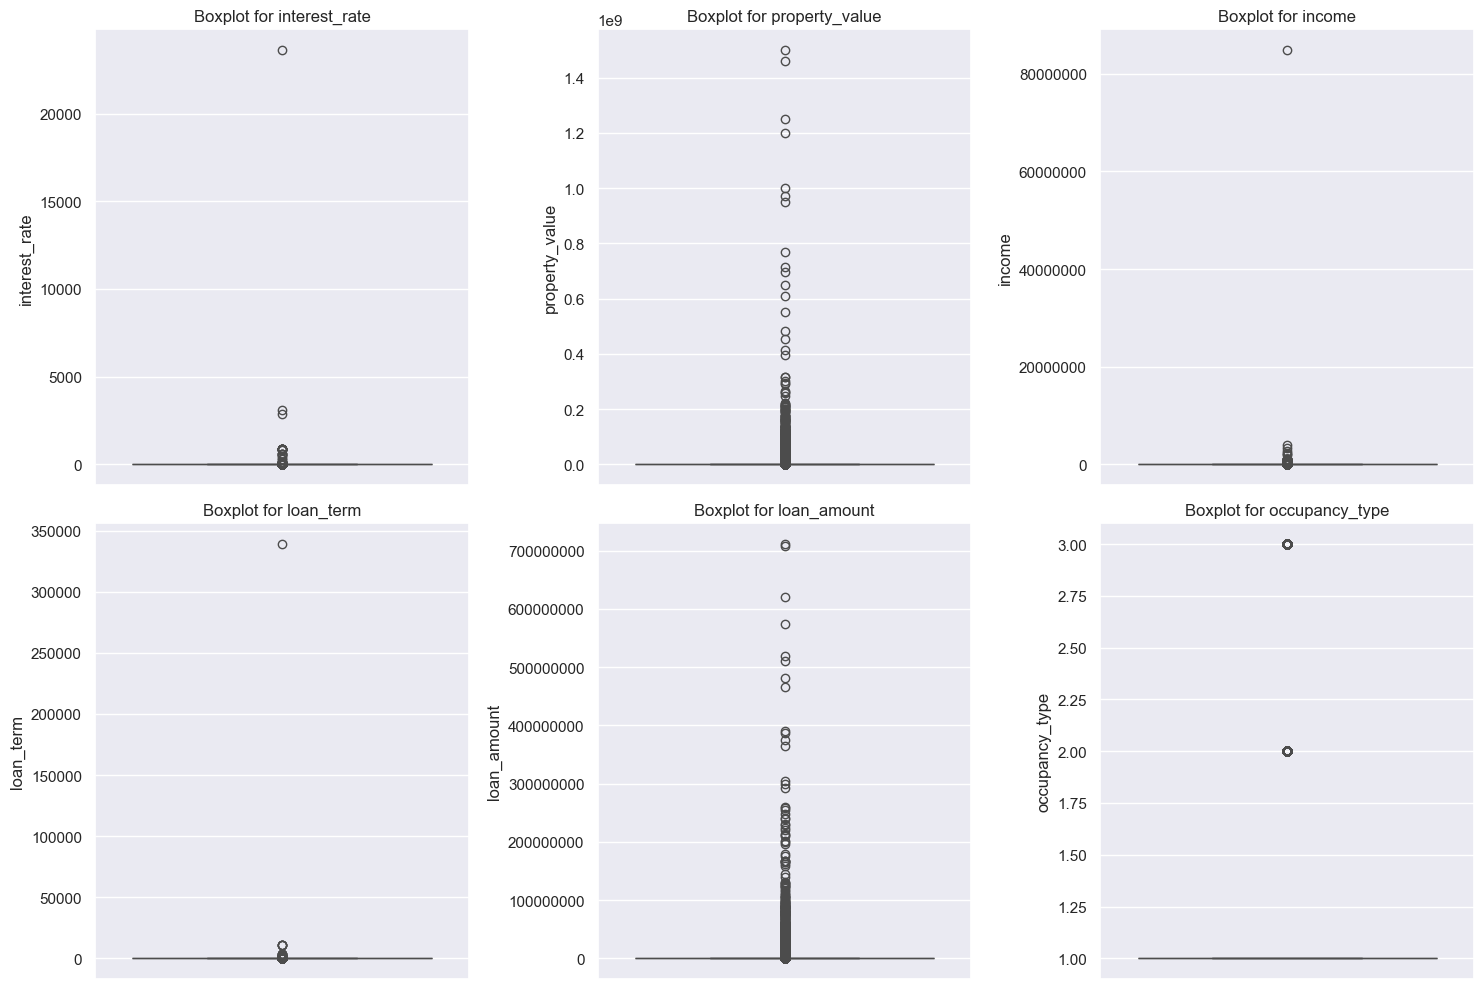

In [24]:

df_char = df[['interest_rate','property_value','income','loan_term','loan_amount','occupancy_type']]
create_sns_boxplot_grid(df_char)

# Create New Column to Assign label of 'Appoved' or 'Denied'

In [12]:
approved_condition = (df['action_taken'] == 1) | (df['action_taken'] == 2) | (df['action_taken'] == 5)| (df['action_taken'] == 6)| (df['action_taken'] == 8)
rejected_condition = (df['action_taken'] == 3) | (df['action_taken'] ==7)
df.loc[approved_condition, 'approved'] = 1 
df.loc[rejected_condition, 'approved'] = 0


## Function to count number of Approved loans vs Rejected and Check missing values

In [13]:
def calculate_class_partition(data,col):
    pos_class = sum(data[col])
    neg_class = df.shape[0] - pos_class
    missing = df.isnull().any(axis=1).sum()
    display(df[col].count())
    display(df.shape)
    display(df.shape[0] - pos_class)
    display(missing)
    return (pos_class, neg_class,missing)

In [14]:
[pos_class, neg_class,missing]=calculate_class_partition(df,'approved')


1644168

(1644168, 64)

177309.0

493071

In [15]:
def graph_class_distribution(pos_class, neg_class,missing):
    classes = []
    classes.append([1,
                    pos_class,
                    neg_class,
                    round(pos_class / df.shape[0], 4) * 100,
                    round(neg_class / df.shape[0], 4) * 100,
                    round(missing / df.shape[0], 4) * 100
                    ])
    classes_df = pd.DataFrame(classes)
    classes_df.columns = ['Dataset', 'Num. of pos. class', 'Num. of neg. class',
                        'Perc. of pos. class', 'Perc. of neg. class',
                        'Perc. of rows with missing']
    classes_df = classes_df.set_index('Dataset')
    #display(classes_df)
    return classes_df

In [16]:
graph_class_distribution(pos_class, neg_class,missing)

Num. of pos. class  Num. of neg. class  Perc. of pos. class  \
Dataset                                                                
1                 1466859.0            177309.0                89.22   

         Perc. of neg. class  Perc. of rows with missing  
Dataset                                                   
1                      10.78                       29.99

In [17]:
# plot missing
def plot_missing(df):
    missing = df.isnull().any(axis=1).sum()
    round(missing / df.shape[0], 4) * 100
    missing_df = pd.DataFrame({'missing' : df.isnull().any(axis=1),
                           'approved' : df['approved']})

    plt.figure(figsize=(8,5))
    sns.barplot(x='approved', y='missing', data=missing_df, ci=None)
    plt.title('dataset 1')
    plt.show()

In [18]:
plot_missing(df_cleaned)

NameError: name 'df_cleaned' is not defined

In [ ]:
df.head(10)

In [19]:
df_cleaned = pd.DataFrame.copy(df,deep=True)

In [20]:
cols = df_cleaned.select_dtypes(include='object').columns

for col in cols:
    if col != 'state_code':
        df_cleaned[col] = pd.factorize(df_cleaned[col])[0]

In [21]:
ca_data = df_cleaned[df_cleaned['state_code']=='CA']
ca_df = pd.DataFrame.copy(ca_data,deep=True)
ca_data.drop('state_code',axis=1,inplace=True)

/var/folders/q8/5zyfv1pj21xg64dnyqpnntfm0000gn/T/ipykernel_65765/3742797086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_data.drop('state_code',axis=1,inplace=True)


In [22]:
il_data = df_cleaned[df_cleaned['state_code']=='IL']
il_df = pd.DataFrame.copy(il_data,deep=True)
il_df.drop('state_code',axis=1,inplace=True)

In [163]:
df_cleaned.shape

(1644168, 64)

In [164]:
# Separate the data by state
illinois_mortgages = df_cleaned[df_cleaned['state_code'] == 'IL']['loan_amount']
california_mortgages = df_cleaned[df_cleaned['state_code'] == 'CA']['loan_amount']


In [165]:
from scipy import stats
# Perform the t-test
t_stat, p_value = stats.ttest_ind(illinois_mortgages, california_mortgages, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -239.2783473750706
P-value: 0.0


## Correlation Analysis


In [166]:
full_df = df_cleaned
full_df.drop('state_code',axis=1,inplace=True)
X = full_df.corr()
X = full_df.drop(['approved'], axis=1)
y = full_df['approved']

In [24]:
X = il_df.corr()
X = il_df.drop(['approved'], axis=1)
y = il_df['approved']

<Axes: >

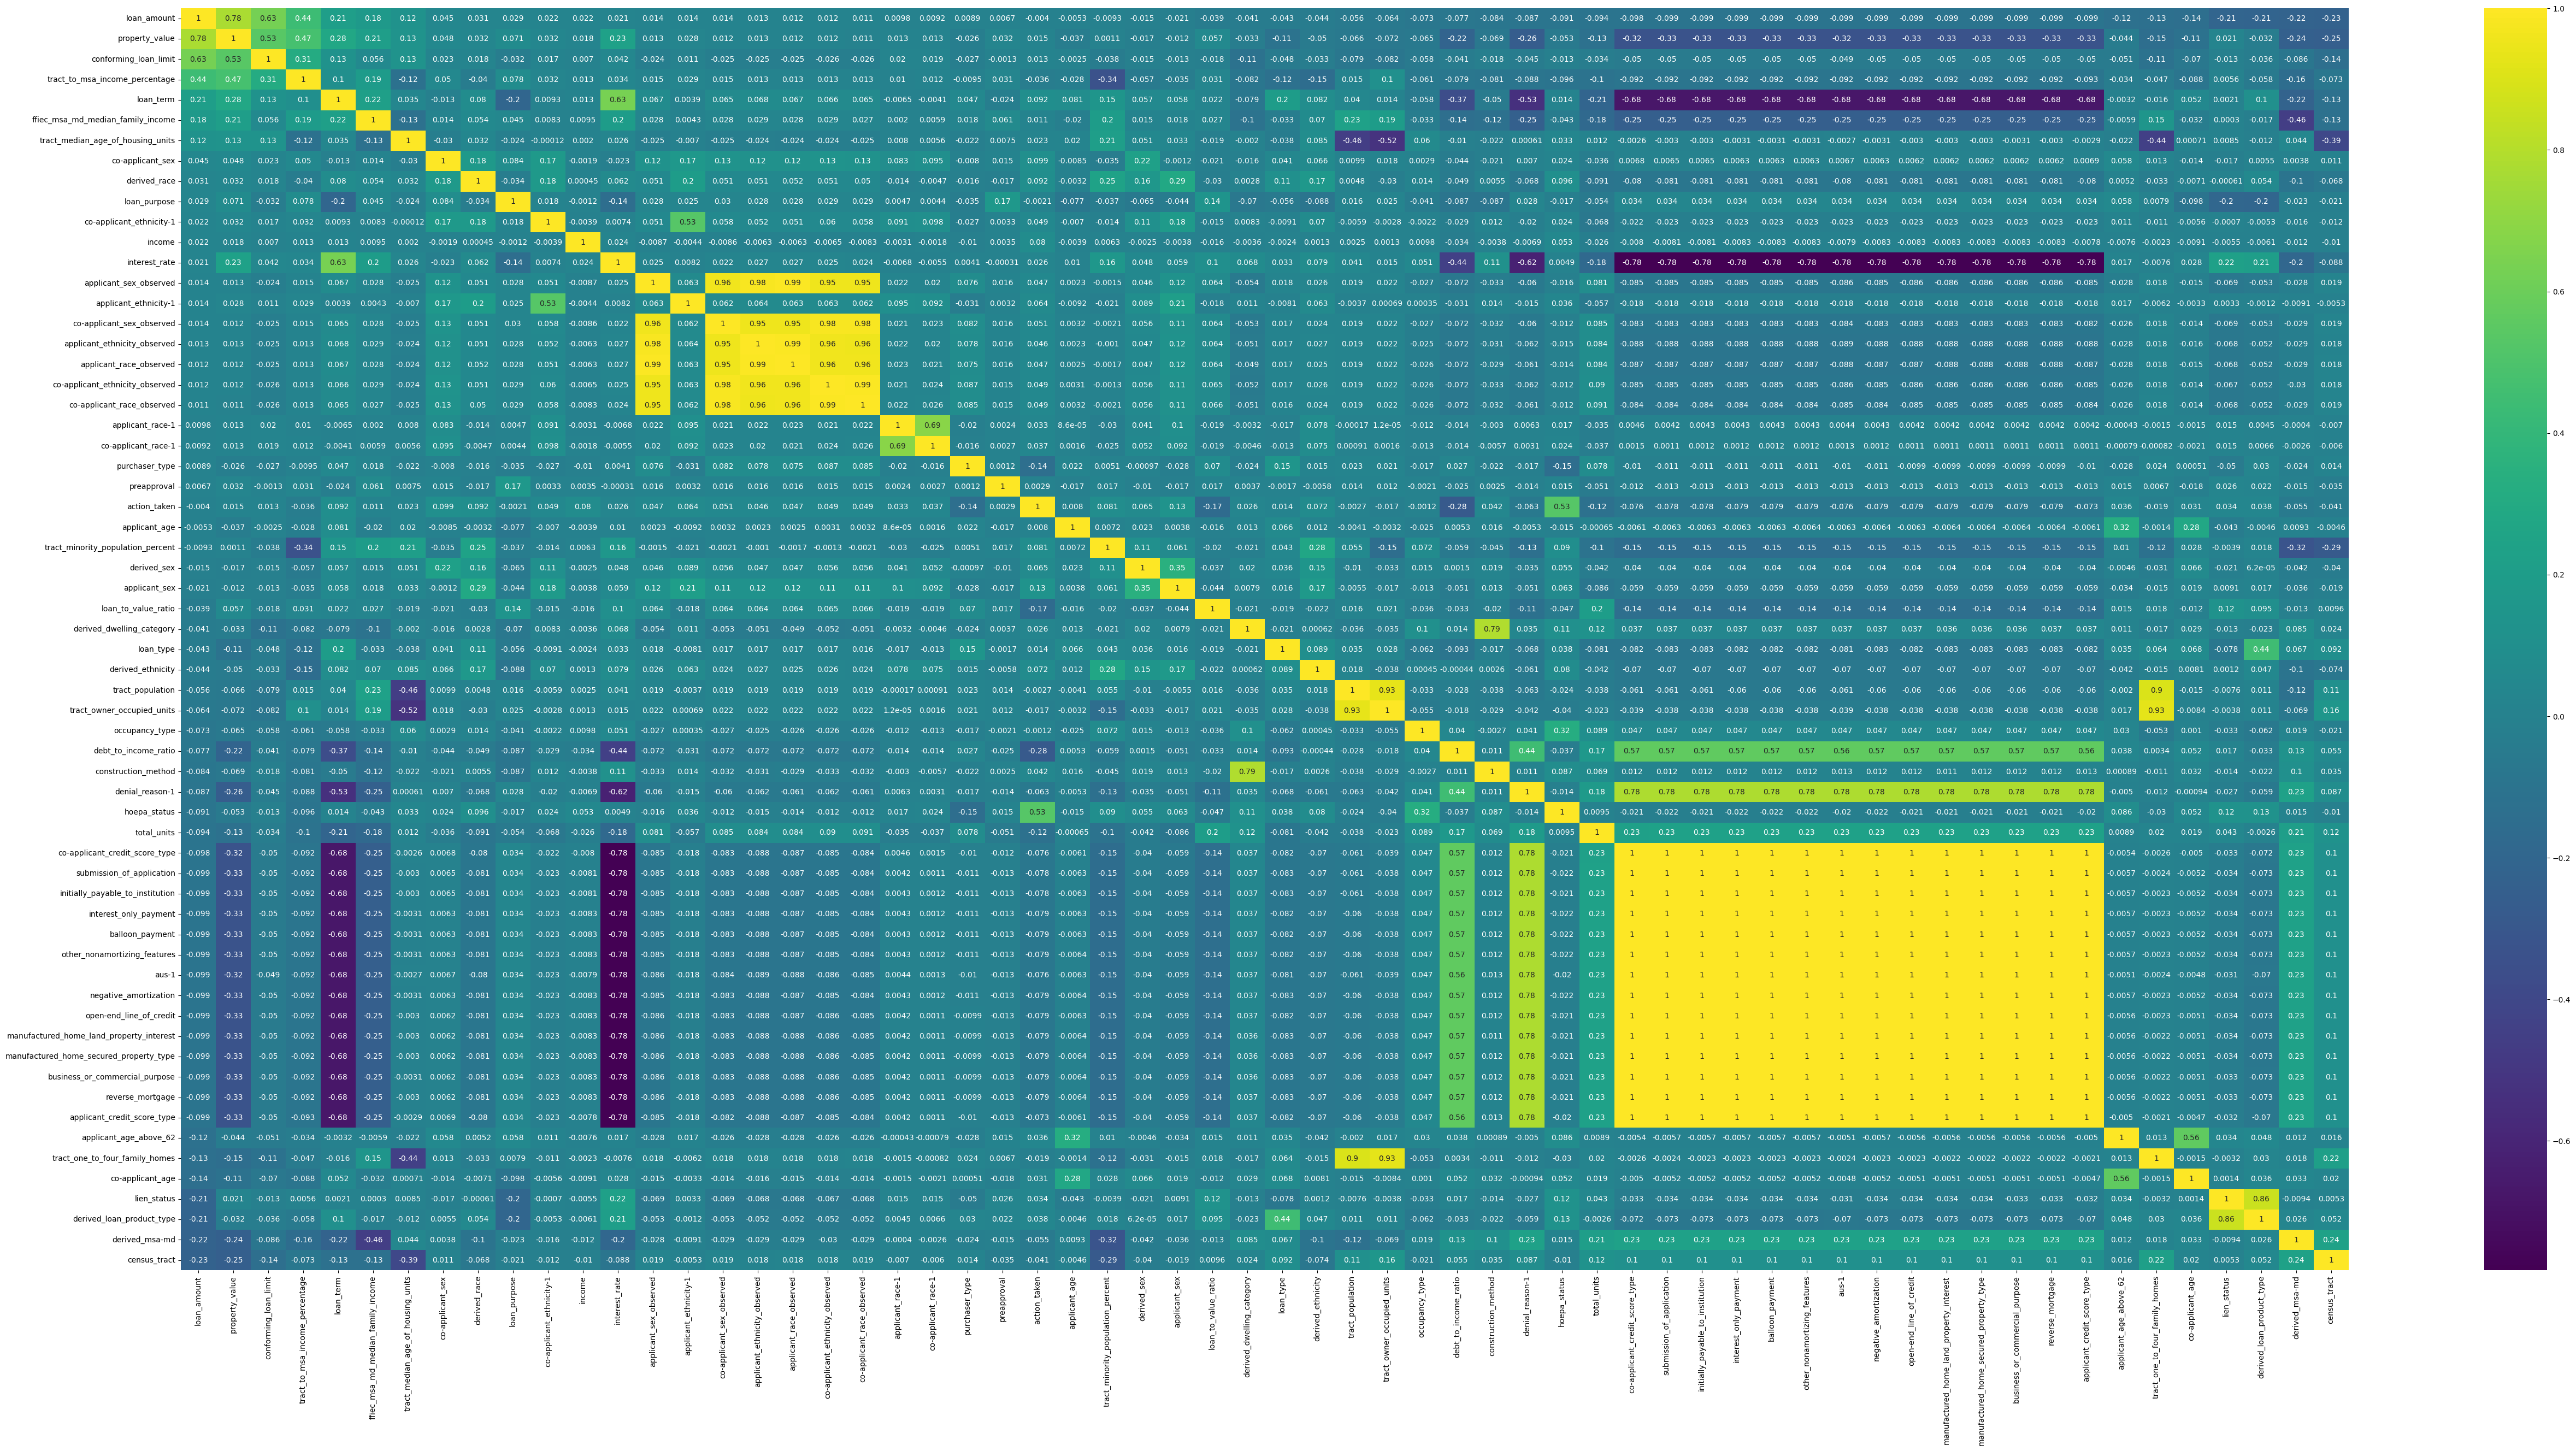

In [25]:
k = 64
cols = X.corr().nlargest(k, 'loan_amount')['loan_amount'].index
cm = X[cols].corr()
plt.figure(figsize=(64, 30))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [26]:
# Gets full data and creates a map of each colum that has correlation with other columns and is higher than 0.9
# Returns a hashmap with keys as variable to keep and value in arrays as highly correlated variables

def corrMapAttributes(arr):
  att = dict();
  reducedArr=arr
 # interval = pd.interval_range(1,64);
  for i in arr:
    for j in reducedArr:
      if(abs(arr[i][j]) >= 0.9 and i != j):
        if i not in att:
          att[i] = list()
        att[i].append(j)
    reducedArr = reducedArr.drop(columns=[i])
  return att

corrArr = X[cols].corr()
corr_att = corrMapAttributes(corrArr)

['applicant_sex_observed', 'co-applicant_sex_observed', 'applicant_ethnicity_observed', 'applicant_race_observed', 'co-applicant_ethnicity_observed', 'tract_population', 'tract_owner_occupied_units', 'co-applicant_credit_score_type', 'submission_of_application', 'initially_payable_to_institution', 'interest_only_payment', 'balloon_payment', 'other_nonamortizing_features', 'aus-1', 'negative_amortization', 'open-end_line_of_credit', 'manufactured_home_land_property_interest', 'manufactured_home_secured_property_type', 'business_or_commercial_purpose', 'reverse_mortgage']
42


<Axes: >

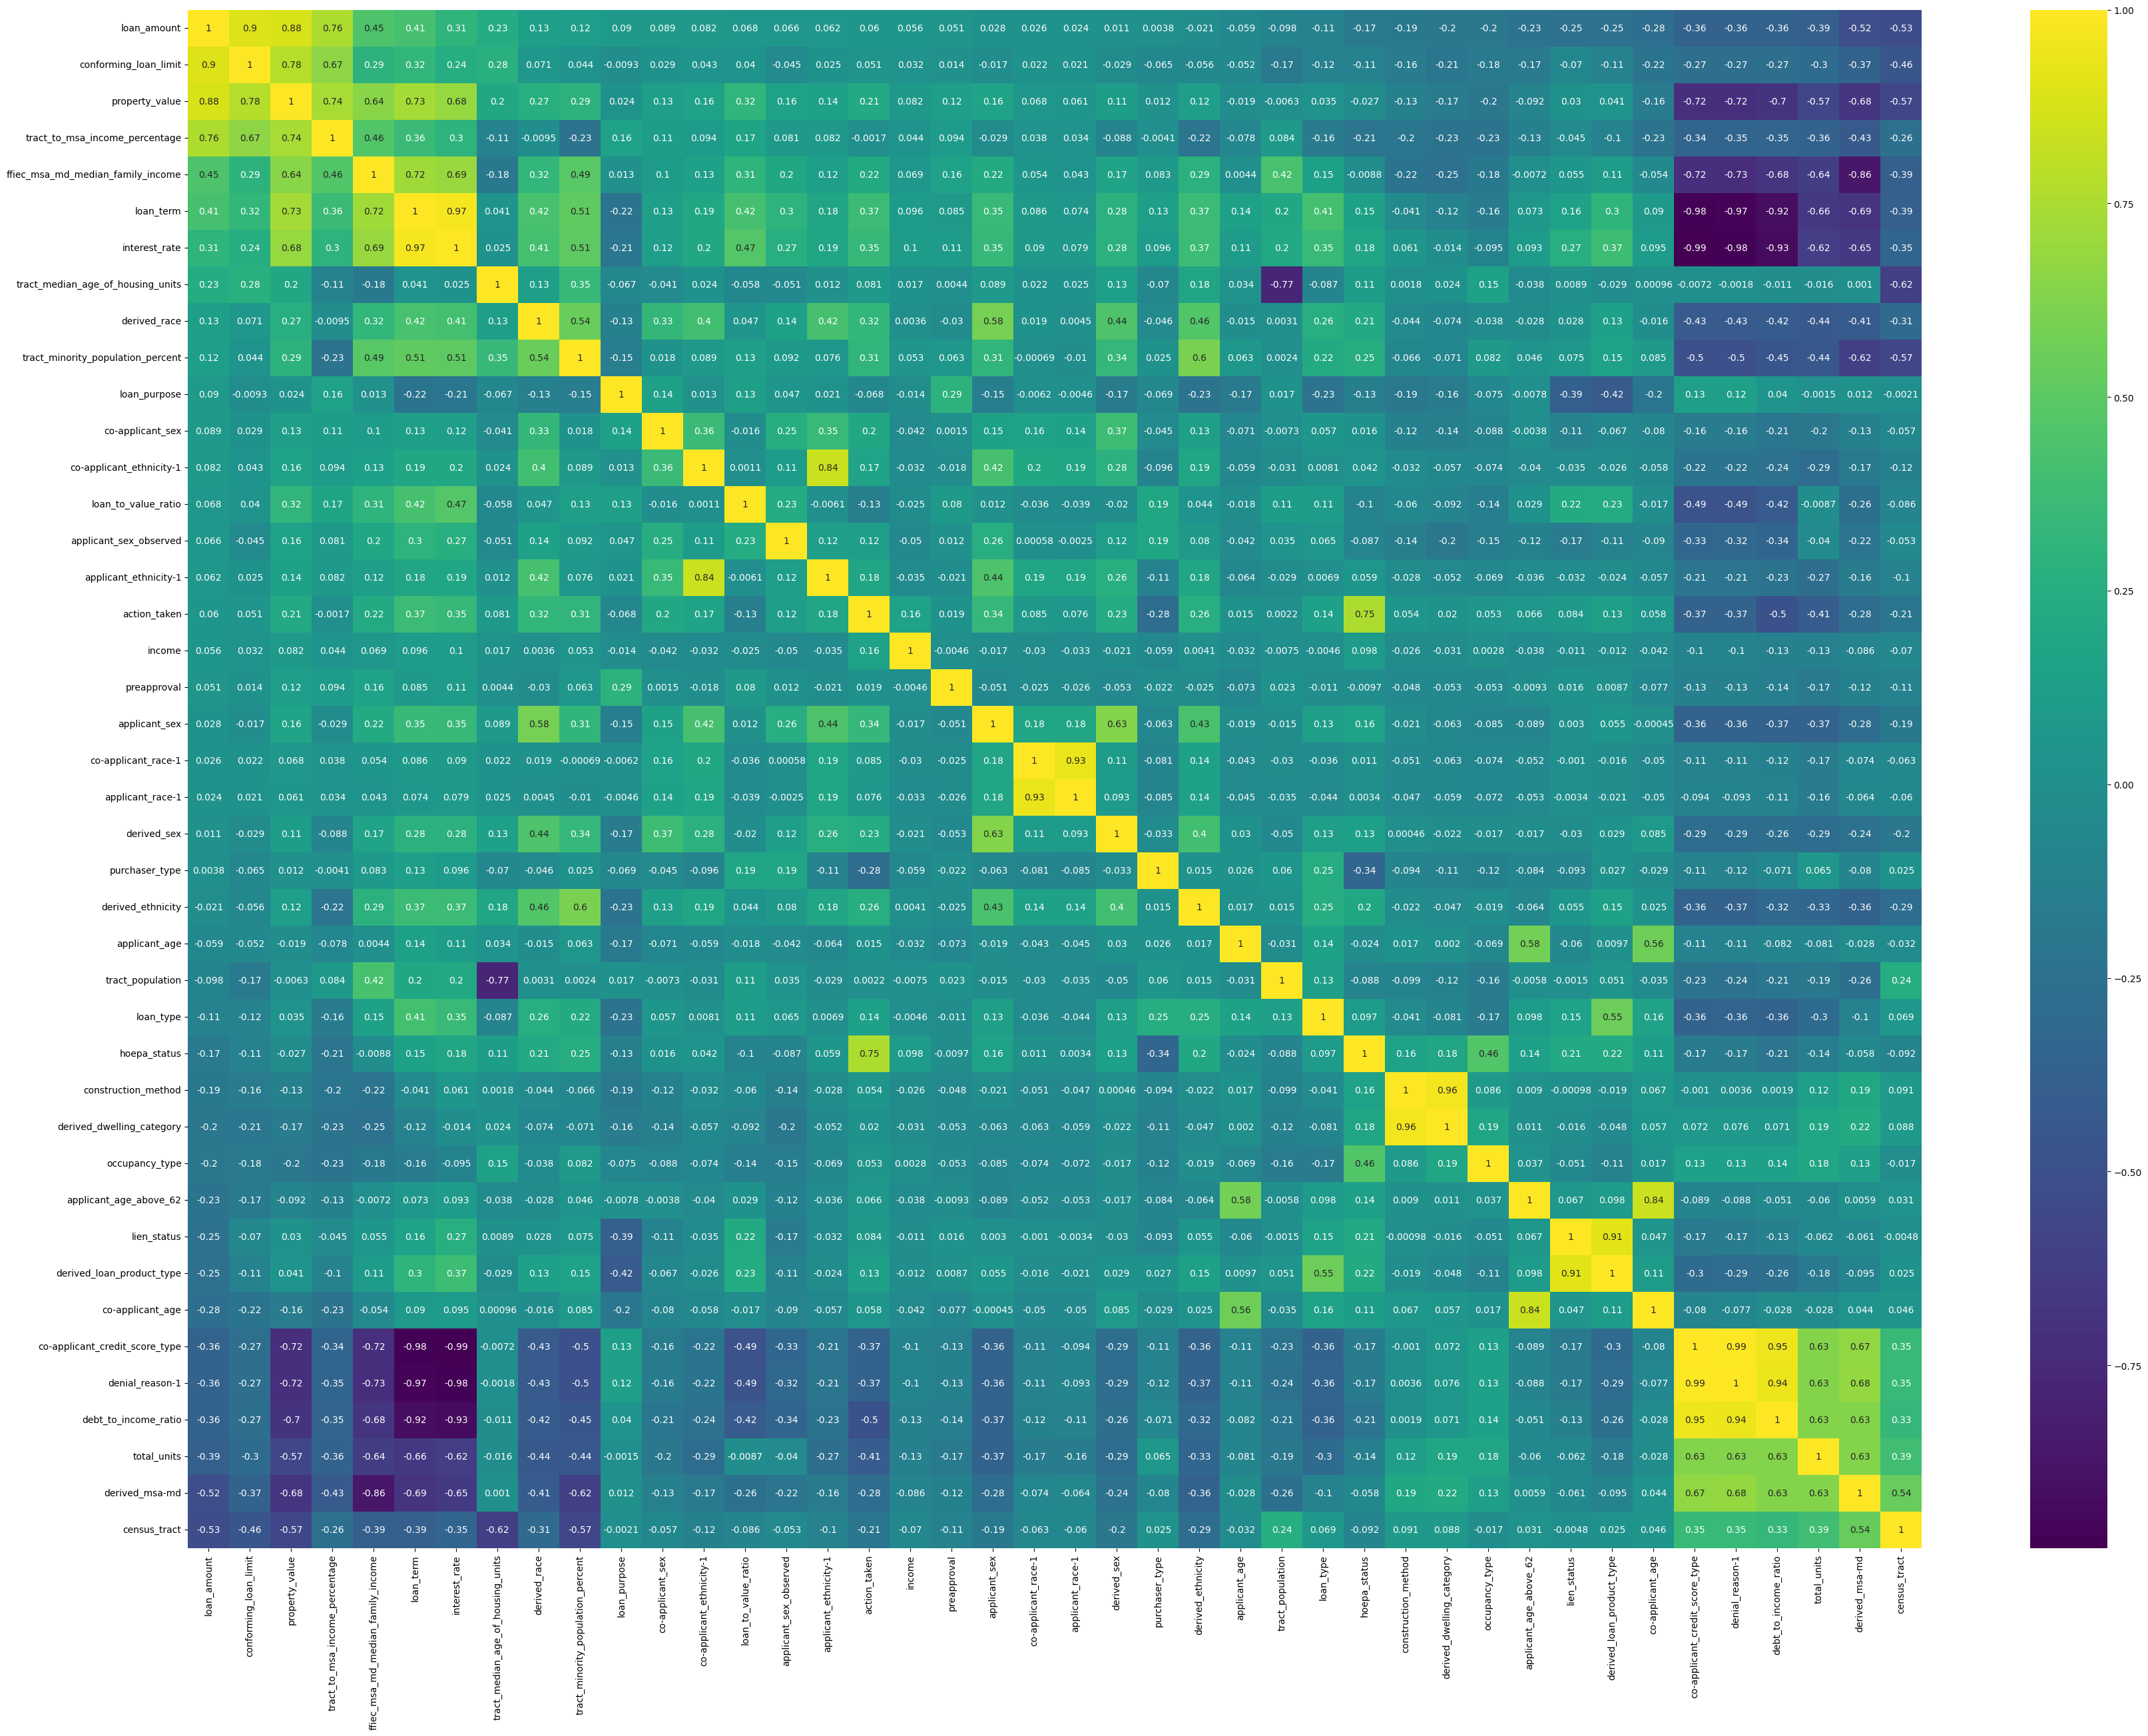

In [27]:
# Creates a new data frame that has removed all columns in the map, but does not
# remove the key, unless the key is also whithin one of the maps array

def attToDrop(Arr, attTD):
  new_df = Arr
  print(list(attTD.keys()))
  for key in attTD:
    for attri in attTD[key]:
      if attri in new_df:
        new_df = new_df.drop(columns=[attri])
  return new_df

corrs = attToDrop(corrArr, corr_att)
print(len(corrs.columns))
k = len(corrs.columns)
cols = corrs.corr().nlargest(k, 'loan_amount')['loan_amount'].index
cm = corrs[cols].corr()
plt.figure(figsize=(k, 30))
sns.heatmap(cm, annot=True, cmap='viridis')

In [28]:
correlated_att = ['denial_reason-1','co-applicant_credit_score_type','derived_dwelling_category']
X = X.drop(correlated_att, axis=1)

<Axes: >

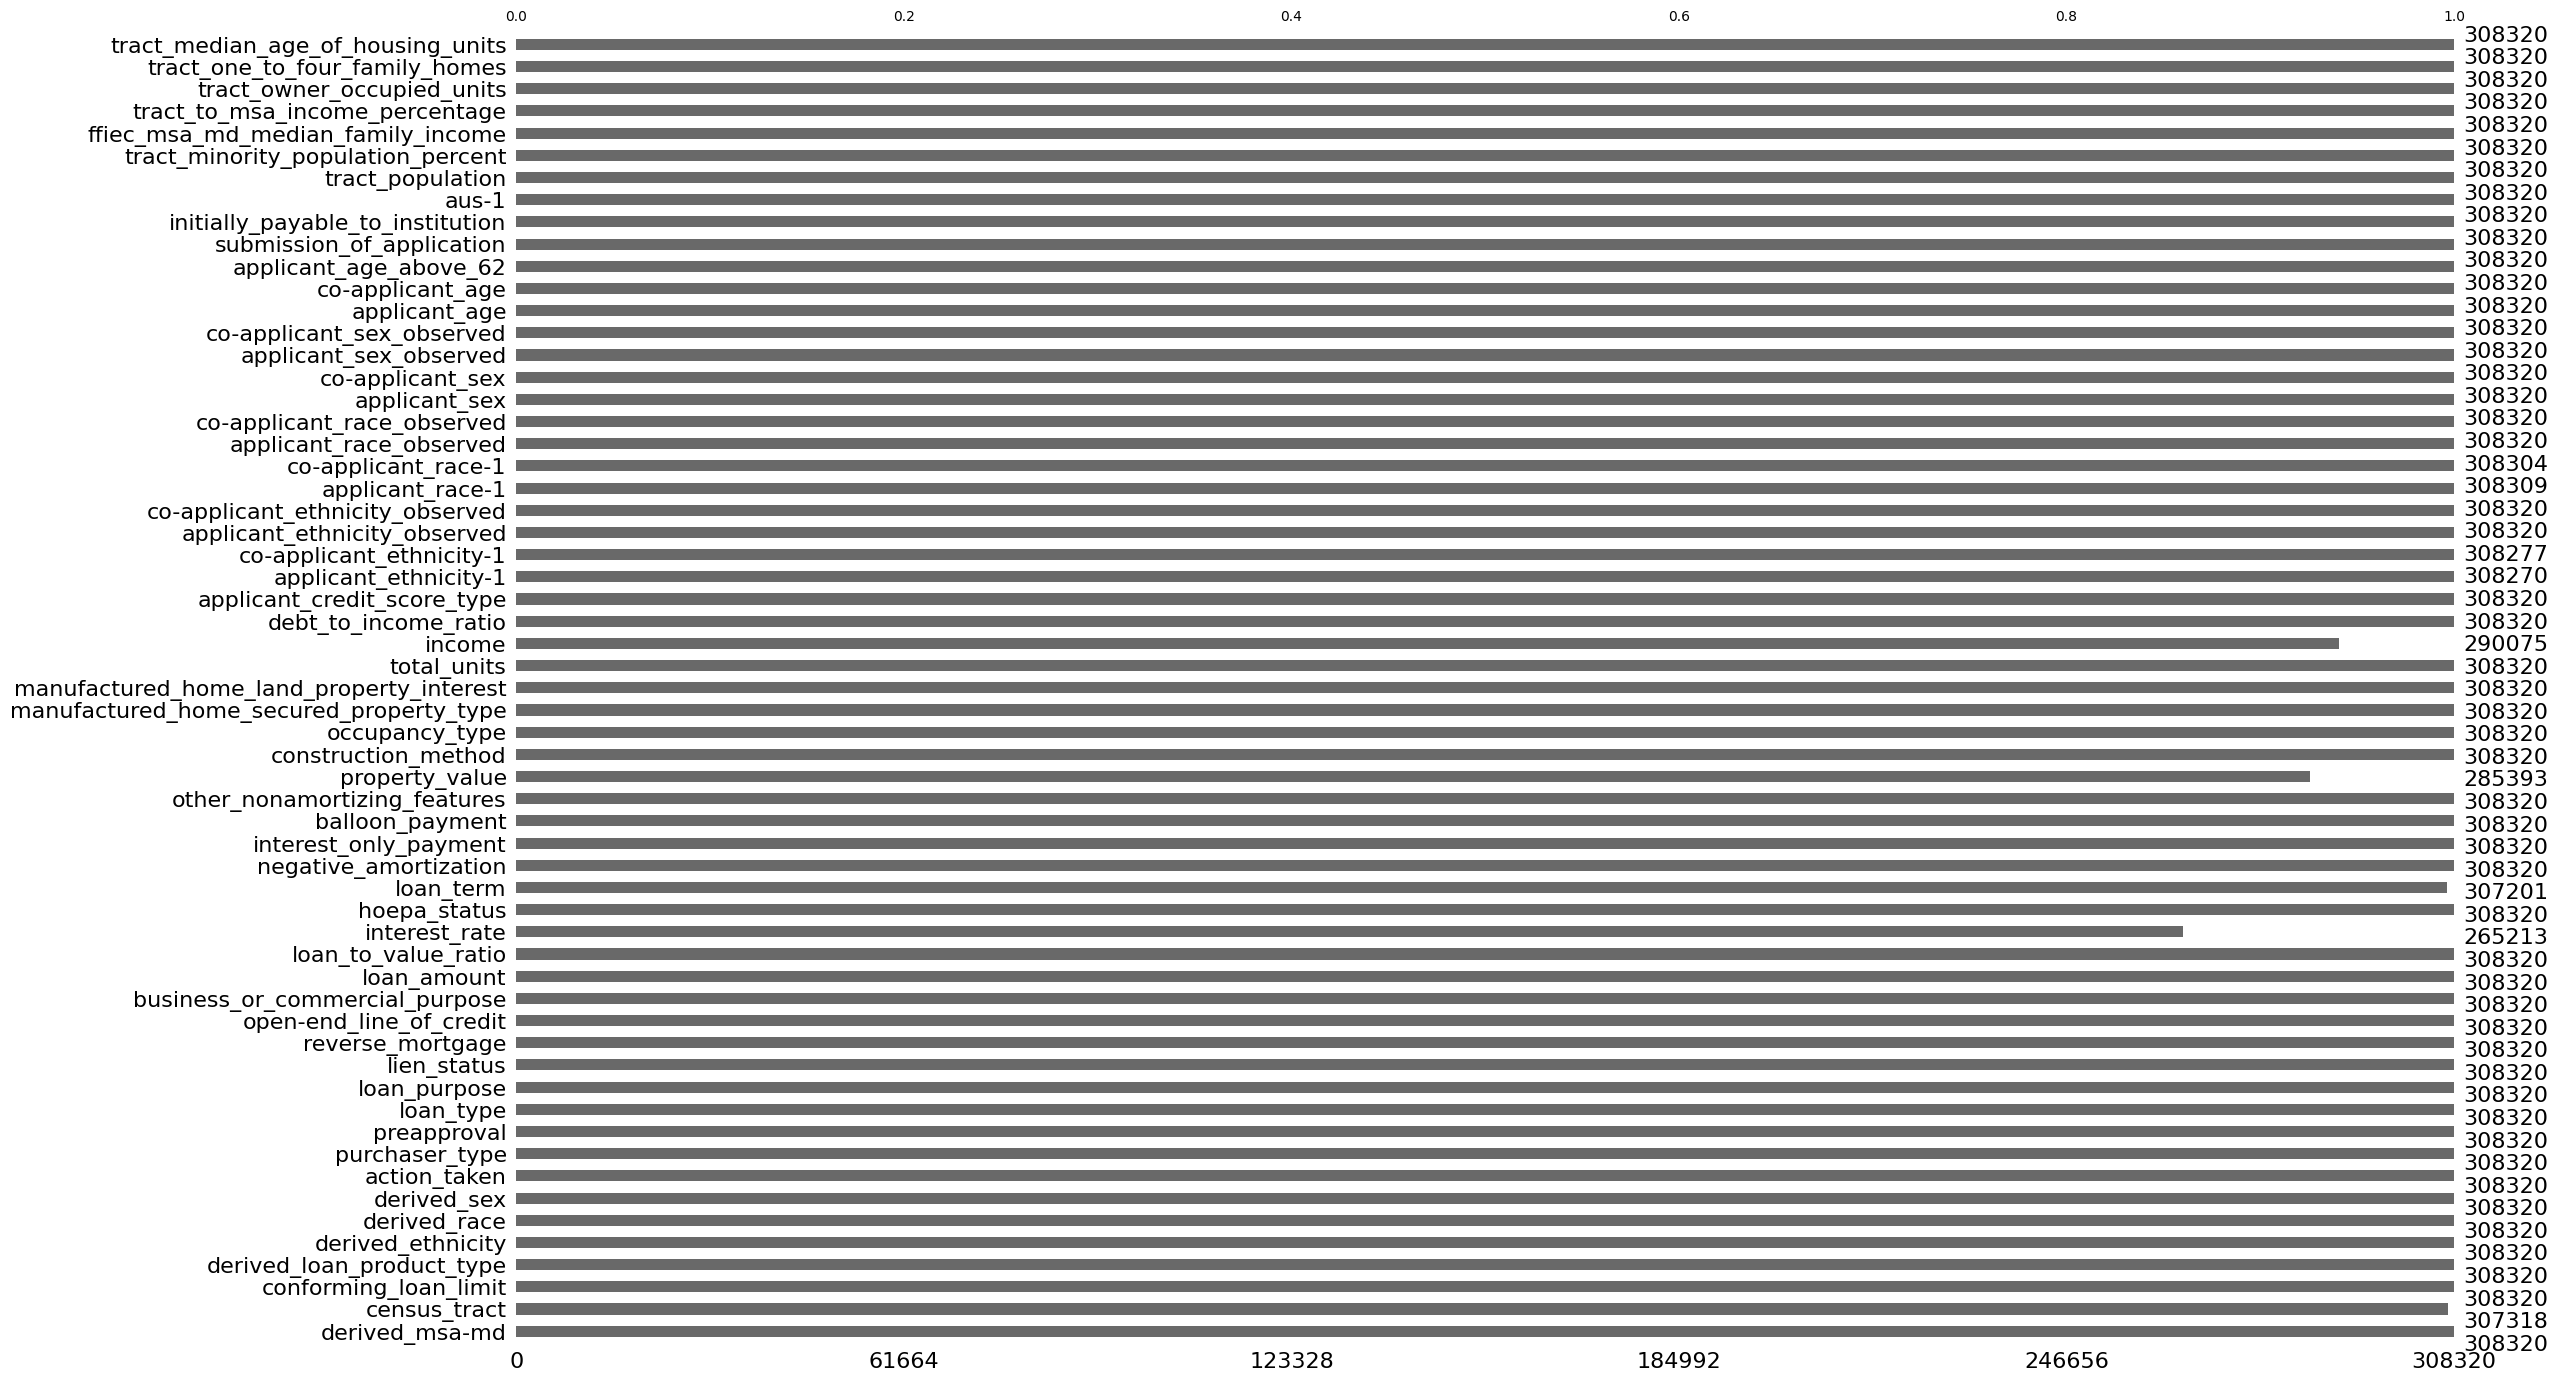

In [29]:
msno.bar(X)

In [173]:
il_data.shape

(308320, 64)

In [121]:
print('income missing data',il_data['income'].isnull().sum())
print('interest rate missing',il_data['interest_rate'].isnull().sum())

income missing data 18245
interest rate missing 43107


In [175]:
il_data.drop_duplicates()
print(il_data.shape)

(308320, 64)


/var/folders/q8/5zyfv1pj21xg64dnyqpnntfm0000gn/T/ipykernel_28579/1869281501.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='approved', y='missing', data=missing_df, ci=None)


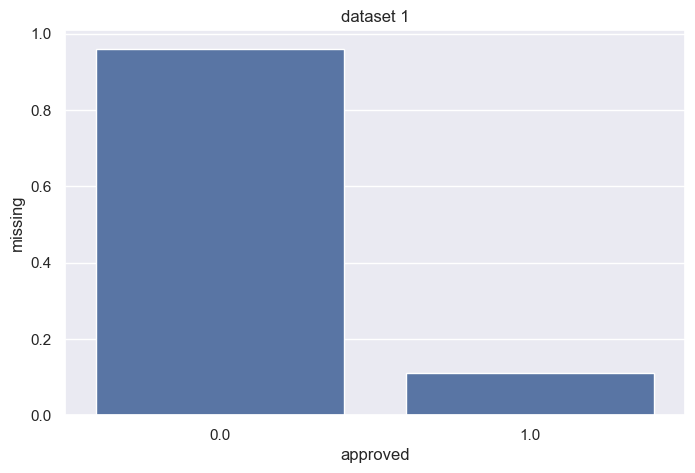

In [144]:
plot_missing(il_data)

# TRAIN TEST SPLIT

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2)

y_test = list(y_test.values)
y_train = list(y_train.values)
y_test = pd.Series(y_test).astype(bool)
y_train = pd.Series(y_train).astype(bool)

In [72]:
y_train.shape

(246656,)

In [31]:
X_train.shape

(246656, 59)

# Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Imputation

In [231]:
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=2)
X_train_imp = imputer.fit_transform(X_train_scaled)

X_train_imp = pd.DataFrame(X_train_imp)

KeyboardInterrupt: 

In [33]:
# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
#il_data
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X_train_scaled)
  
X_train_imp = imputer.transform(X_train_scaled)
X_train_imp = pd.DataFrame(X_train_imp)



In [34]:
missing = X_train_imp.isnull().any(axis=1).sum()
round(missing / X_train_imp.shape[0], 4) * 100

0.0

In [35]:
X_test_imp = imputer.transform(X_test_scaled)
X_test_imp = pd.DataFrame(X_test_imp)

# Handling Unbalanced Data

In [36]:
y_train  = pd.Series(y_train)

In [59]:
smote_ratio = (sum(y_train) / (len(y_train) - sum(y_train)))/100
1 / smote_ratio
print("smote_ratio",smote_ratio)

smote_ratio 0.0917725697309787


In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=2*smote_ratio)

X_res, y_res = smote.fit_resample(X_train_imp, y_train)

In [61]:
(len(y_res) - sum(y_res)) / sum(y_res)

0.1835446452657135

In [62]:
y_res

0          True
1          True
2          True
3          True
4          True
          ...  
263239    False
263240    False
263241    False
263242    False
263243    False
Length: 263244, dtype: bool

In [63]:
from imblearn.under_sampling import EditedNearestNeighbours

renn = EditedNearestNeighbours()
X_resampled, y_resampled = renn.fit_resample(X_res, y_res)

In [64]:
from sklearn.cluster import KMeans

kmeans_ratio = 5
kmeans = KMeans(n_clusters=kmeans_ratio)
kmeans.fit(X_resampled[(y_resampled == 0)])
centers = pd.DataFrame(kmeans.cluster_centers_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [65]:
X_app2 = pd.DataFrame(X_resampled[(y_resampled == 1)])
X_app2 = pd.concat([X_app2, pd.DataFrame(centers)], ignore_index=True)
y_train_ = [1] * sum(y_res) + [0] * (X_app2.shape[0] - sum(y_res))

In [66]:
print('length',X_app2,' sum:',y_train_) 

length               0         1         2         3         4         5         6   \
40824  -0.470724 -0.886105  4.382884 -0.386949 -0.459323 -0.492355 -0.329337   
40825  -0.610261  0.508998 -0.217978 -0.386949 -0.459323 -0.492355 -0.329337   
40826   0.801537  1.430427 -0.217978 -0.386949 -0.459323 -0.492355 -0.329337   
40827  -0.282578  0.113969 -0.217978  0.628761  3.203497  1.456818  4.623591   
40828  -0.470724 -0.888327 -0.217978 -0.386949 -0.459323  3.405992 -0.329337   
...          ...       ...       ...       ...       ...       ...       ...   
252827  0.112012  0.250708 -0.217978 -0.386949 -0.459323  0.482232 -0.329337   
252828  0.628874  2.010527 -0.217978 -0.386949 -0.459323 -0.492355 -0.329337   
252829 -0.282578  0.114034 -0.217978 -0.386949 -0.459323 -0.492355 -0.329337   
252830 -0.470724 -0.889675 -0.217978 -0.386949  0.761617  1.456818  1.321639   
252831 -0.470724 -0.671068 -0.217978 -0.386949  0.761617 -0.492355 -0.329337   

              7         8       

# Training Models

In [81]:
from sklearn.model_selection import GridSearchCV

def custom_f1_score(estimator, X, y):
    y_pred = estimator.predict(X)
    score = f1_score(y, y_pred)
    return score

def grid_search(clf, params, X_, y_):
    grid = GridSearchCV(clf, params, scoring=custom_f1_score, cv=5)
    grid.fit(X_, y_)
    print("Best F1-score: ", grid.best_score_)
    return grid.best_params_

In [82]:
class_weights = {0 : 1, 1 : 5}
best_params = []

logreg_params = {'C' : [1e-2, 1e-1, 1, 10, 100],
                 'class_weight' : ['balanced', class_weights]}

rf_params = {'n_estimators' : [50, 100, 200],
               'criterion' : ['gini', 'entropy'],
               'max_depth' : [3, 5, 7, None],
               'min_samples_leaf' : [1, 3, 5],
               'class_weight' : ['balanced', class_weights]}

adaboost_params = {'n_estimators' : [50, 100, 200]}


clfs = [
        ('LogReg', LogisticRegression(), logreg_params),
        ('RF', RandomForestClassifier(), rf_params),
        ('AdaBoost', AdaBoostClassifier(), adaboost_params)
]

for clf in clfs:
    print(clf[0])
    best_p = grid_search(clf[1], clf[2], X_train_imp, y_train)
    print(best_p)
    best_params.append([clf[0], best_p])

LogReg


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Best F1-score:  0.9483324663979541
{'C': 0.01, 'class_weight': {0: 1, 1: 5}}
RF


KeyboardInterrupt: 

# Evaluate Model Results

In [83]:
def calculate_metrics(y_true, y_pred):
    print("F1-score: ", round(f1_score(y_test, y_pred), 4))
    print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))
    print("Presicion: ", round(precision_score(y_test, y_pred), 4))
    print("Recall: ", round(recall_score(y_test, y_pred), 4))

In [84]:
def plot_mat(mat):
    sns.heatmap(mat, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix')
    plt.show()

# Logistic Regression

In [85]:
logreg = LogisticRegression(**best_params[0][1])
logreg.fit(X_train_imp, y_train)

y_pred = logreg.predict(X_test_imp)
mat = confusion_matrix(y_test, y_pred)

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

logreg = LogisticRegression(**best_params[0][1])

# Wrap the model in a pipeline that includes standardization
# Standardization is done within the cross-validation loop
pipeline = make_pipeline(StandardScaler(), logreg)

# Perform cross-validation
# cv=5 means 5-fold cross-validation
# scoring can be changed depending on the metric of interest
# 'accuracy' can be replaced with 'roc_auc', 'f1', 'precision', 'recall', etc.
scores = cross_val_score(pipeline, X_train_imp, y_train, cv=5, scoring='accuracy')

# Print out the mean and standard deviation of the cross-validation scores
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Accuracy: 0.90 (+/- 0.00)


In [88]:
coefficients = logreg.coef_[0]

# Create a DataFrame for easier viewing
feature_importance = pd.DataFrame(coefficients, index=X.columns, columns=['Coefficient'])

# Calculate the absolute values of the coefficients for ranking
feature_importance['Absolute'] = feature_importance['Coefficient'].abs()

# Sort by absolute value in descending order
feature_importance = feature_importance.sort_values(by='Absolute', ascending=False)


In [89]:
print(feature_importance)

                                          Coefficient  Absolute
tract_population                            -0.040158  0.040158
tract_owner_occupied_units                   0.030808  0.030808
applicant_ethnicity_observed                -0.024192  0.024192
co-applicant_ethnicity_observed              0.021907  0.021907
applicant_credit_score_type                  0.021376  0.021376
tract_one_to_four_family_homes               0.021117  0.021117
open-end_line_of_credit                     -0.019838  0.019838
applicant_sex_observed                       0.017349  0.017349
loan_amount                                  0.017035  0.017035
derived_ethnicity                            0.015709  0.015709
co-applicant_sex_observed                   -0.015669  0.015669
derived_msa-md                               0.015081  0.015081
occupancy_type                              -0.015003  0.015003
co-applicant_race_observed                   0.013414  0.013414
applicant_race-1                        

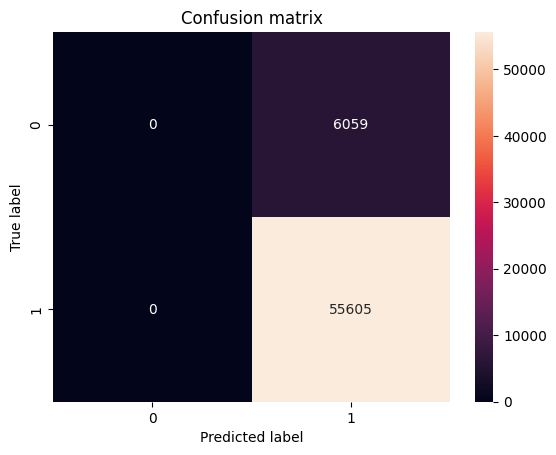

In [86]:
plot_mat(mat)

In [87]:
calculate_metrics(y_test, y_pred)

F1-score:  0.9483
Accuracy:  0.9017
Presicion:  0.9017
Recall:  1.0


# Random Forest

In [ ]:
rf = RandomForestClassifier(**best_params[2][1])
rf.fit(X_train_imp, y_train)

y_pred = rf.predict(X_test_imp)
mat = confusion_matrix(y_test, y_pred)

In [ ]:
plot_mat(mat)

In [ ]:

calculate_metrics(y_test, y_pred)

# Ada Boosting

In [ ]:

adaboost = AdaBoostClassifier(**best_params[3][1])
adaboost.fit(X_train_imp, y_train)

y_pred = adaboost.predict(X_test_imp)
mat = confusion_matrix(y_test, y_pred)

In [ ]:
plot_mat(mat)

In [ ]:
calculate_metrics(y_test, y_pred)